# **Project Name**    -  PharmaOptimizer: Data-Driven Pricing Analysis for Smart Pharma Strategies



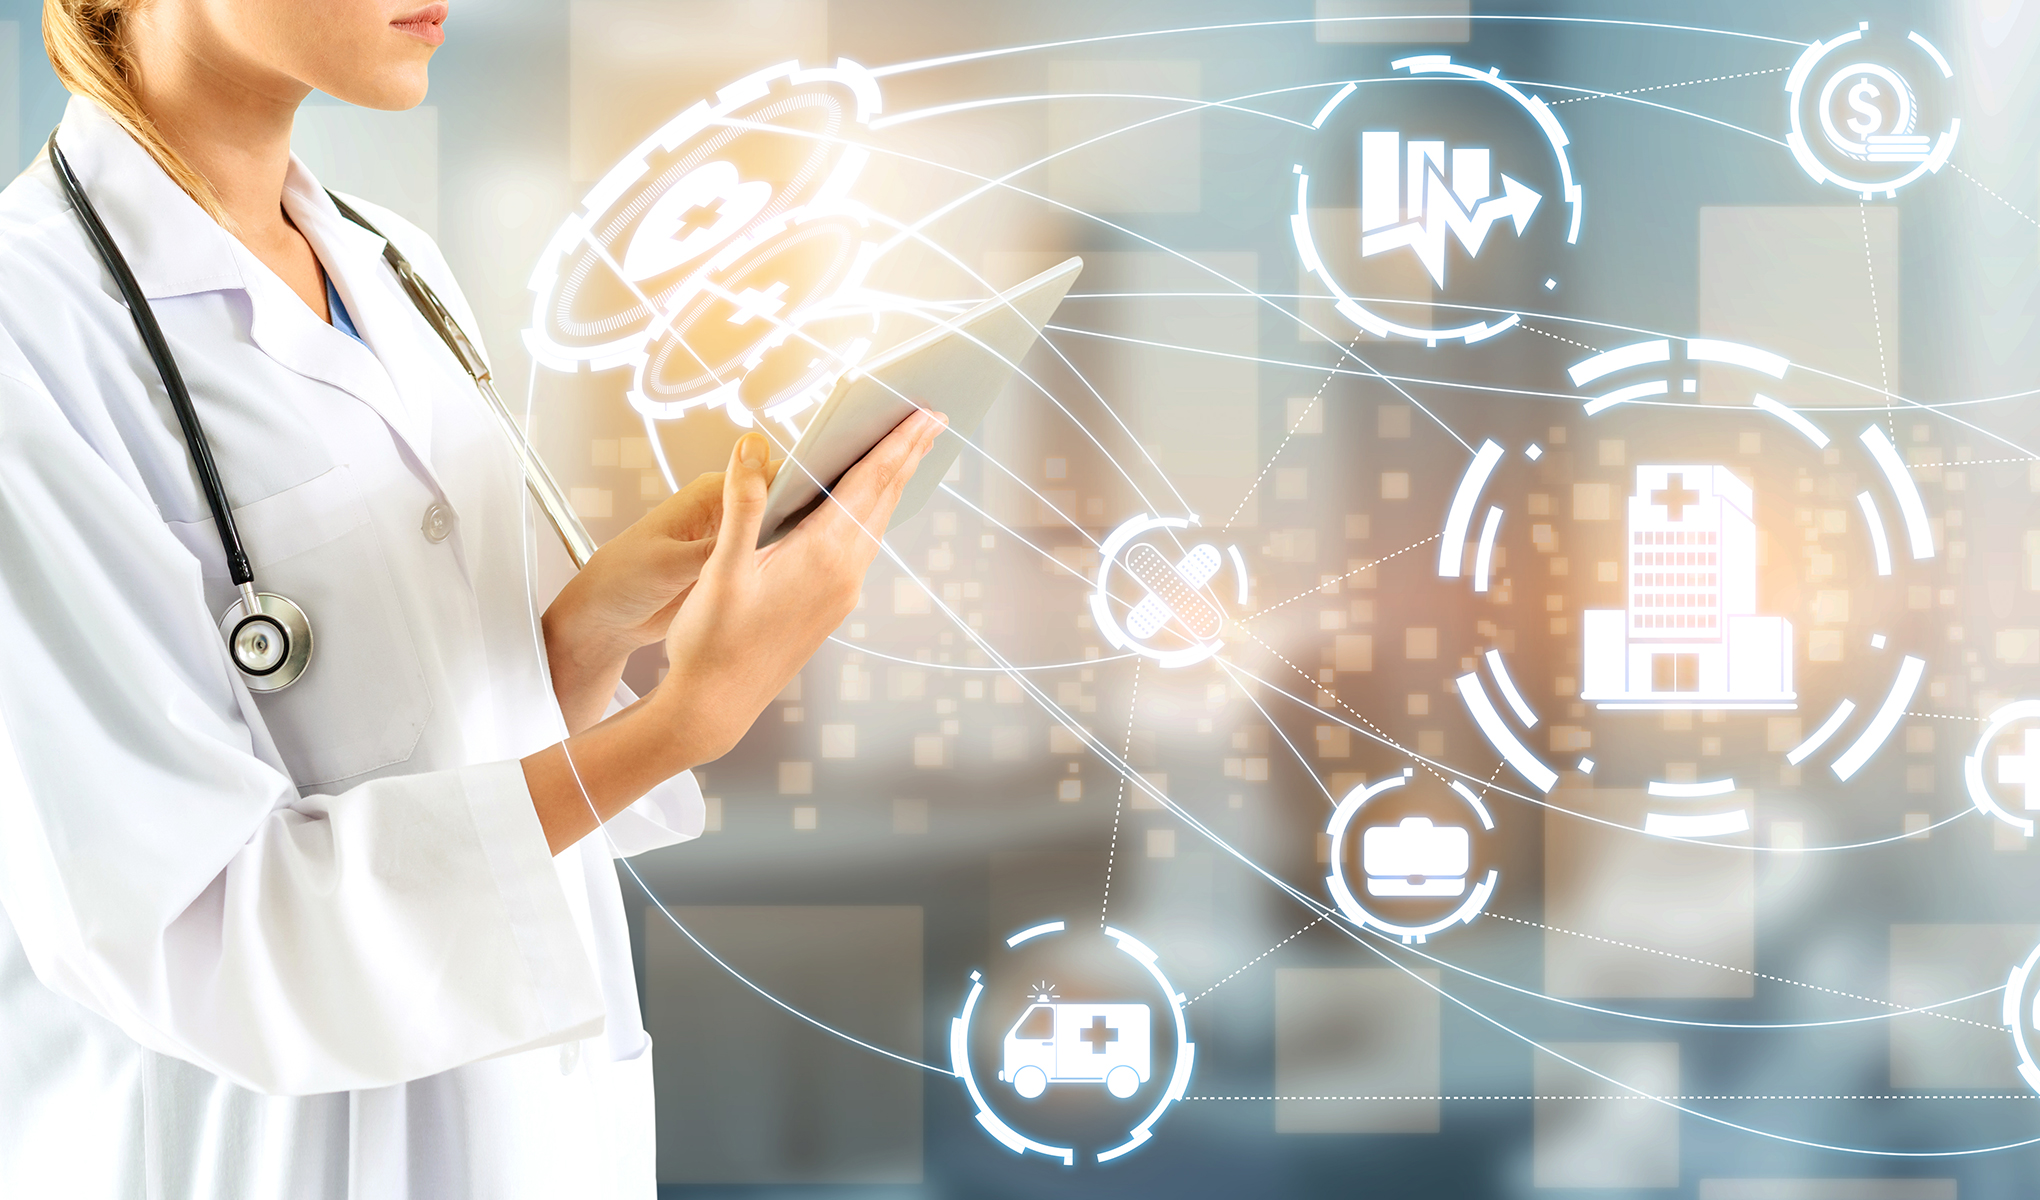

# **Project Summary -**

Pharmaceutical Price Prediction – Data-Driven Pricing Optimization
Project Overview
The pharmaceutical industry relies on accurate pricing strategies to balance profitability and affordability. This project leverages data analytics and machine learning to optimize medicine pricing by analyzing key attributes such as drug composition, dosage, and packaging. By employing predictive modeling, the project aims to enhance decision-making for manufacturers, retailers, and consumers, ensuring competitive pricing while maintaining profitability.

Price Optimization & Prediction
Optimizing pharmaceutical prices requires understanding various factors influencing costs. This project applies regression models like:

Linear Regression

Random Forest Regressor

XGBoost Regressor

LightGBM Regressor

The models considered multiple pricing factors, including:

✅ Active ingredients & dosage

✅ Number of tablets per strip

✅ Manufacturer details

✅ Market trends & pricing variations

Through rigorous model evaluation using RMSE, R² Score, and MAE, the Random Forest Regressor emerged as the best model, offering reliable price predictions and actionable insights for stakeholders.

Tools & Techniques
The project was developed using Python and leading data science libraries, including:

Pandas & NumPy for data preprocessing

Scikit-learn, XGBoost & LightGBM for model building

Matplotlib & Seaborn for data visualization

RandomizedSearchCV for hyperparameter tuning

Data preprocessing involved handling missing values, encoding categorical

variables, and applying log transformation to normalize price distributions.

Key Business Impact
This project delivers substantial value by enabling:

📌 Informed Pricing Strategies – Helping manufacturers and retailers optimize product prices.

📌 Competitive Market Positioning – Adjusting prices based on data-driven insights.

📌 Targeted Marketing & Inventory Planning – Segmenting products for effective marketing campaigns.

📌 Anomaly Detection – Identifying unexpected pricing variations or errors.

📌 Consumer Benefits – Ensuring affordability through fair pricing and cost predictions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The pharmaceutical industry faces complex pricing challenges due to factors such as raw material costs, market demand, competition, government regulations, and regional price variations. Inefficient pricing strategies can lead to profit loss, overpricing, reduced accessibility, and compliance issues.


This project aims to address these challenges by leveraging advanced data analytics and machine learning techniques to develop solutions that enable:

Price Optimization: Predicting optimal prices for pharmaceutical products based on their attributes.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import pickle


### Dataset Loading

In [ ]:
file_path="/content/web scraping data 2.xlsx"
data = pd.read_excel(file_path, sheet_name="Data")



/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Dataset First View

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23897 entries, 0 to 23896
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tablet Name                23897 non-null  object 
 1   Disease                    23897 non-null  object 
 2   Rx Required                23897 non-null  int64  
 3   Price                      23897 non-null  int64  
 4   Discount                   23897 non-null  int64  
 5   Country of Origin          23897 non-null  object 
 6   Manufacturer               23897 non-null  object 
 7   Tablet Info                23897 non-null  object 
 8   Gm per lotion              23896 non-null  float64
 9   Facewash - Gm per tube     23897 non-null  int64  
 10  Spray- Ml per tube         23888 non-null  float64
 11  Ointment - Gm per tube.1   23897 non-null  int64  
 12  Oral solution-Ml per tube  23897 non-null  int64  
 13  Cream-Gm per tube          23888 non-null  flo

In [ ]:

data

Tablet Name              Disease  Rx Required  \
0                 Cogniza Tablet 10'S                 ADHD            1   
1             Atrest 25mg Tablet 10'S                 ADHD            1   
2            Capnea Oral Solution 1ml                 ADHD            1   
3                Capnea Injection 1ml                 ADHD            1   
4        Cognistar 60mg Injection 1's                 ADHD            1   
...                               ...                  ...          ...   
23892   YULIFT 3X FIRMING Cream 100ml  Wrinkle/Anti Ageing            0   
23893               NERVANA Cream 50g  Wrinkle/Anti Ageing            0   
23894  DS GOLD ANTI AGEING Cream 50gm  Wrinkle/Anti Ageing            0   
23895             RETILIFT Cream 30gm  Wrinkle/Anti Ageing            0   
23896         MELARID Face Wash 100gm  Wrinkle/Anti Ageing            0   

       Price  Discount Country of Origin              Manufacturer  \
0        239         0             India       linux laboratories    
1        336        12             India  centaur pharmaceuticals    
2        276         0             India                    cipla    
3        247        12             India                    cipla    
4       1315        12             India                    lupin    
...      ...       ...               ...                       ...   
23892   2700         0             India     yuderma laboratories    
23893    399         0             India   leewell pharmaceutical    
23894   2209         0             India      adonis laboratories    
23895    951        12             India       apple therapeutics    
23896    540         0             India     yuderma laboratories    

                                             Tablet Info  Gm per lotion  \
0                       Cerebroprotein Hydrolysate 90 mg            0.0   
1                                    Tetrabenazine 25 mg            0.0   
2                                         Caffeine 20 mg            0.0   
3                                         Caffeine 20 mg            0.0   
4                       Cerebroprotein Hydrolysate 60 mg            0.0   
...                                                  ...            ...   
23892  Aloe Vera Extract+Argan Oil+Ceramide+Niacinami...            0.0   
23893  Almond Oil+Aloe Vera+Coconut Oil+Shea Butter+U...            0.0   
23894                                          Skin Care            0.0   
23895  ALOE VERA+Ascorbyl Palmitate+RETINOL+Stearic A...            0.0   
23896                                      Not Available            0.0   

       Facewash - Gm per tube  Spray- Ml per tube  Ointment - Gm per tube.1  \
0                           0                 0.0                         0   
1                           0                 0.0                         0   
2                           0                 0.0                         0   
3                           0                 0.0                         0   
4                           0                 0.0                         0   
...                       ...                 ...                       ...   
23892                       0                 0.0                         0   
23893                       0                 0.0                         0   
23894                       0                 0.0                         0   
23895                       0                 0.0                         0   
23896                     100                 0.0                         0   

       Oral solution-Ml per tube  Cream-Gm per tube  Injection  \
0                              0                0.0        0.0   
1                              0                0.0        0.0   
2                              1                0.0        0.0   
3                              0                0.0        1.0   
4                              0                0.0        1.0   
...                          ...      

### Dataset Rows & Columns count

In [ ]:

rows, columns = data.shape

# Print the number of rows and columns
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 23897
Number of columns: 18


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23897 entries, 0 to 23896
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tablet Name                23897 non-null  object 
 1   Disease                    23897 non-null  object 
 2   Rx Required                23897 non-null  int64  
 3   Price                      23897 non-null  int64  
 4   Discount                   23897 non-null  int64  
 5   Country of Origin          23897 non-null  object 
 6   Manufacturer               23897 non-null  object 
 7   Tablet Info                23897 non-null  object 
 8   Gm per lotion              23896 non-null  float64
 9   Facewash - Gm per tube     23897 non-null  int64  
 10  Spray- Ml per tube         23888 non-null  float64
 11  Ointment - Gm per tube.1   23897 non-null  int64  
 12  Oral solution-Ml per tube  23897 non-null  int64  
 13  Cream-Gm per tube          23888 non-null  flo

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = data.isnull().sum()

print("Missing values count for each column:")
print(missing_values_count)

total_missing_values = data.isnull().sum().sum()
print(f"Total number of missing values: {total_missing_values}")


Missing values count for each column:
Tablet Name                   0
Disease                       0
Rx Required                   0
Price                         0
Discount                      0
Country of Origin             0
Manufacturer                  0
Tablet Info                   0
Gm per lotion                 1
Facewash - Gm per tube        0
Spray- Ml per tube            9
Ointment - Gm per tube.1      0
Oral solution-Ml per tube     0
Cream-Gm per tube             9
Injection                    19
Tablet per strip              7
capsule per strip             2
Comapny Type                  0
dtype: int64
Total number of missing values: 47


### What did you know about your dataset?

Total Rows and Columns:

The dataset has 23,897 rows and 8 columns.
Data Columns and Types:

Tablet Name: Object (string) type, with no missing values.
Disease: Object (string) type, with no missing values.
Rx Required: Boolean (True/False) type, with no missing values.
Price: Integer type, with no missing values.
Discount: Integer type, with no missing values.
Country of Origin: Object (string) type, with no missing values.
Manufacturer: Object (string) type, with no missing values.
Tablet Info: Object (string) type, with no missing values.
Missing Values:

There are no missing (null) values in any of the columns, as the count of non-null values in all columns matches the total number of rows.
Duplicate Rows:

The dataset has no duplicate rows.
Data Integrity:

The dataset is clean in terms of missing data and duplicates, making it suitable for analysis or model training without needing to address those issues.
Summary:
The dataset appears to be well-structured with no missing values or duplicate records, making it easy to proceed with analysis, feature engineering, or model training without any immediate data cleaning tasks related to nulls or duplicates.

## ***2. Understanding Your Variables***

In [ ]:
data.columns

Index(['Tablet Name', 'Disease', 'Rx Required', 'Price', 'Discount',
       'Country of Origin', 'Manufacturer', 'Tablet Info', 'Gm per lotion',
       'Facewash - Gm per tube', 'Spray- Ml per tube',
       'Ointment - Gm per tube.1', 'Oral solution-Ml per tube',
       'Cream-Gm per tube', 'Injection', 'Tablet per strip',
       'capsule per strip', 'Comapny Type'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe(include=['object',"bool"])

Tablet Name            Disease Country of Origin  \
count                 23897              23897             23897   
unique                23897                140                29   
top     Cogniza Tablet 10'S  Fungal Infections             India   
freq                      1               1000             23615   

                          Manufacturer Tablet Info Comapny Type  
count                            23897       23897        23897  
unique                             636        6388            6  
top     sun pharmaceutical industries    Skin Care      limited  
freq                              1034         200        11472

### Variables Description

Tablet Name:
Type: Object (String)
Description: This column contains the name of the pharmaceutical tablet or product. It helps identify the product in the dataset.
Example Values: "Cogniza Tablet 10'S", "Atrest 25mg Tablet 10'S", etc.

Disease:
Type: Object (String)
Description: This column indicates the disease or condition that the tablet is used to treat. It helps in understanding the therapeutic category of the tablet.
Example Values: "ADHD", "Anxiety", etc.

Rx Required:
Type: Boolean (True/False)
Description: This column indicates whether a prescription is required to purchase the tablet. It helps identify whether the product is over-the-counter (OTC) or prescription-based.
Example Values: True (if a prescription is required), False (if no prescription is required).

Price:
Type: Integer
Description: This column represents the price of the tablet in monetary units (e.g., INR, USD). It helps in understanding the cost associated with the product.
Example Values: 239, 336, 276, etc

Discount:
Type: Integer
Description: This column indicates the discount offered on the product. It could be a percentage or fixed value depending on how it's structured.
Example Values: 0, 12, etc.

Country of Origin:
Type: Object (String)
Description: This column represents the country where the pharmaceutical tablet is manufactured. It provides insight into the geographical origin of the product, which could impact pricing and availability.
Example Values: "India", "USA", etc

Manufacturer:
Type: Object (String)
Description: This column contains the name of the company that manufactures the tablet. It is useful for understanding brand reputation and potential variations in pricing or quality associated with different manufacturers.
Example Values: "Linux Laboratories Pvt Ltd", "Centaur Pharmaceuticals Pvt Ltd", etc

Tablet Info:
Type: Object (String)
Description: This column provides additional details about the tablet, such as its composition, dosage, and form (e.g., "Cerebroprotein Hydrolysate 90 mg", "Tetrabenazine 25 mg").
Example Values: "Cerebroprotein Hydrolysate 90 mg", "Tetrabenazine 25 mg", etc.

The dataset contains a mix of categorical (string) and numerical (integer, boolean) variables.
Categorical variables like "Tablet Name," "Disease," "Country of Origin," "Manufacturer," and "Tablet Info" provide information about the product's identity, origin, and composition.
Numerical variables like "Price" and "Discount" help quantify product characteristics.
Boolean variable "Rx Required" helps to determine if a prescription is needed for the product.

### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
unique_values = data.nunique()
print(unique_values)


Tablet Name                  23897
Disease                        140
Rx Required                      2
Price                         1544
Discount                         9
Country of Origin               29
Manufacturer                   636
Tablet Info                   6388
Gm per lotion                   33
Facewash - Gm per tube          10
Spray- Ml per tube              24
Ointment - Gm per tube.1        14
Oral solution-Ml per tube       17
Cream-Gm per tube               31
Injection                       24
Tablet per strip                39
capsule per strip               25
Comapny Type                     6
dtype: int64


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-12-23027694d868>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')


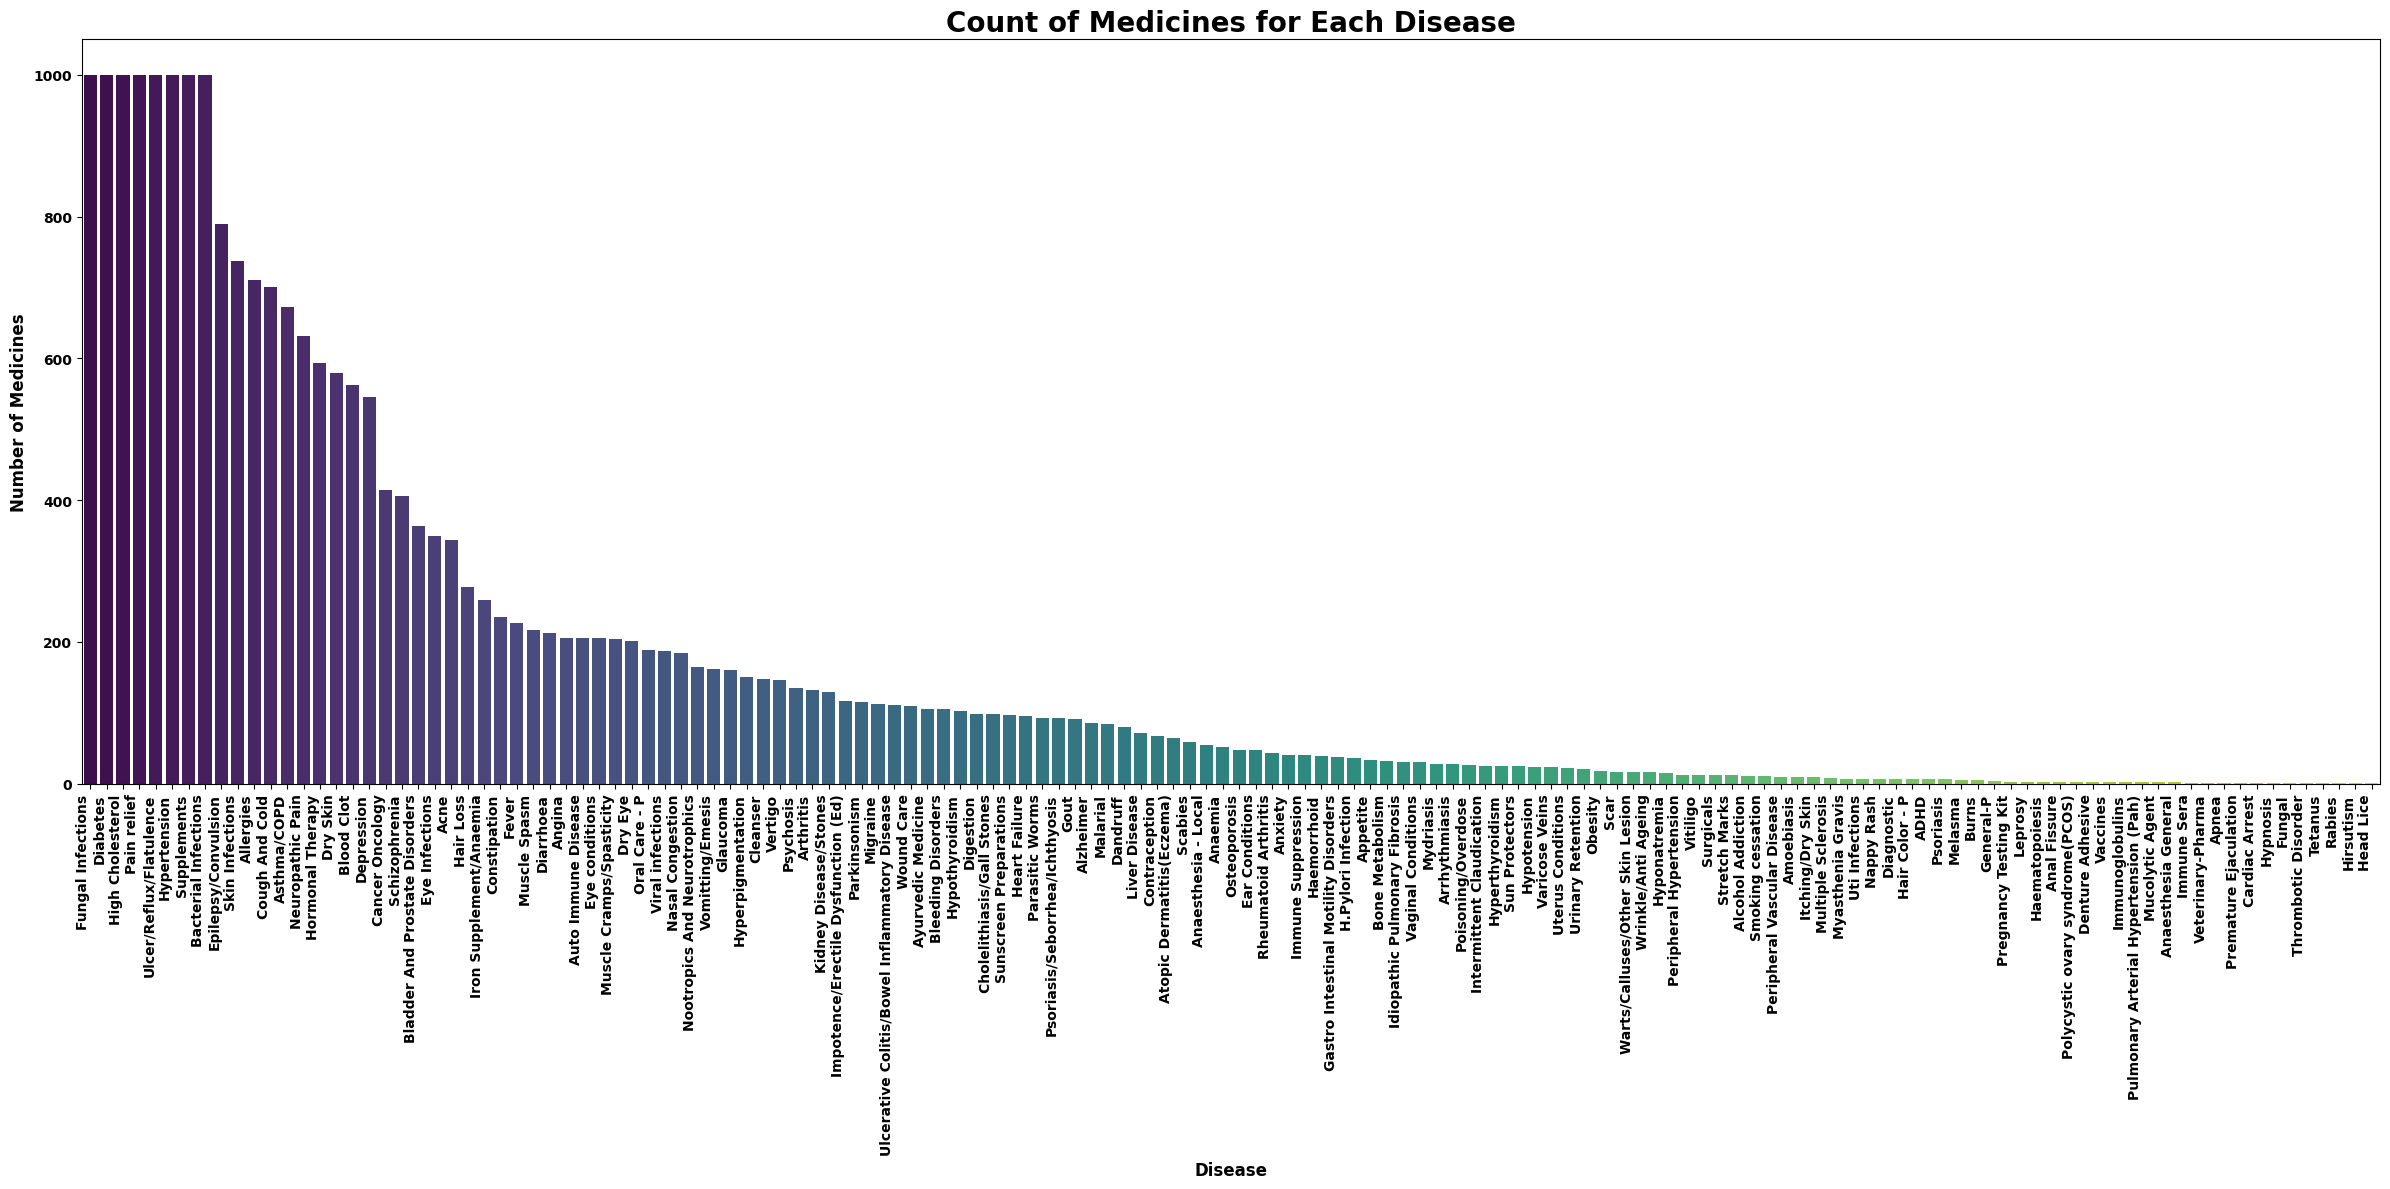

In [ ]:

# Counting the number of medicines for each disease
disease_counts = data['Disease'].value_counts()

# Sorting the disease counts in descending order
disease_counts = disease_counts.sort_values(ascending=False)

plt.figure(figsize=(24, 12))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')

plt.xlabel('Disease', fontsize=12, weight='bold', color='black')
plt.ylabel('Number of Medicines', fontsize=12, weight='bold', color='black')
plt.title('Count of Medicines for Each Disease', fontsize=20, weight='bold', color='black')

plt.xticks(rotation=90, ha='right', fontsize=10, weight='bold', color='black')
plt.yticks(fontsize=10, weight='bold', color='black')

plt.tight_layout()
plt.show()


#### Chart - 2

<ipython-input-13-3218043db870>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rx_required_counts.index, y=rx_required_counts.values, palette='viridis')


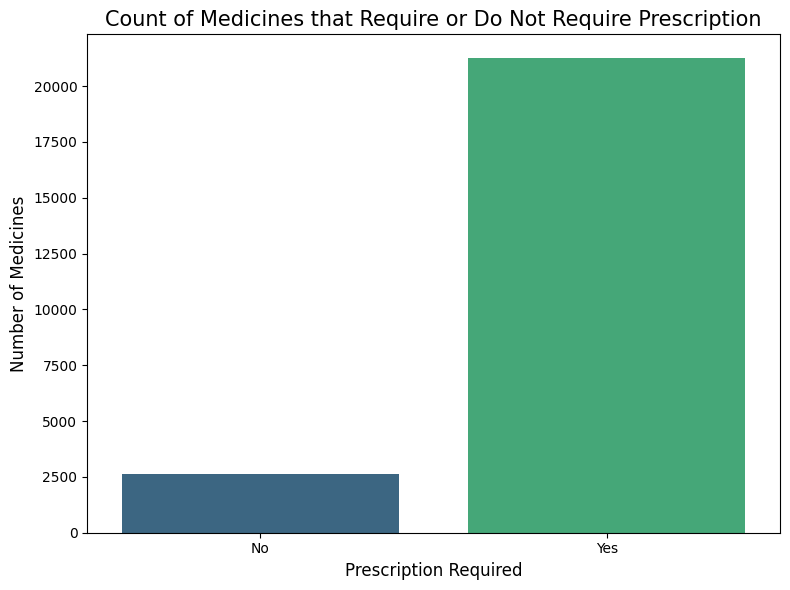

In [ ]:
# Count the number of medicines for each 'Rx Required' category
rx_required_counts = data['Rx Required'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=rx_required_counts.index, y=rx_required_counts.values, palette='viridis')

plt.xlabel('Prescription Required', fontsize=12)
plt.ylabel('Number of Medicines', fontsize=12)
plt.title('Count of Medicines that Require or Do Not Require Prescription', fontsize=15)
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()


#### Chart - 3

<ipython-input-14-b9dae12666ad>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medicine Count', y='Disease', data=top_diseases_rx_true, ax=axes[0, 0], palette='Blues')
<ipython-input-14-b9dae12666ad>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medicine Count', y='Disease', data=bottom_diseases_rx_true, ax=axes[0, 1], palette='Blues_d')
<ipython-input-14-b9dae12666ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medicine Count', y='Disease', data=top_diseases_rx_false, ax=axes[1, 0], palette='Oranges')
<ipython-input-14

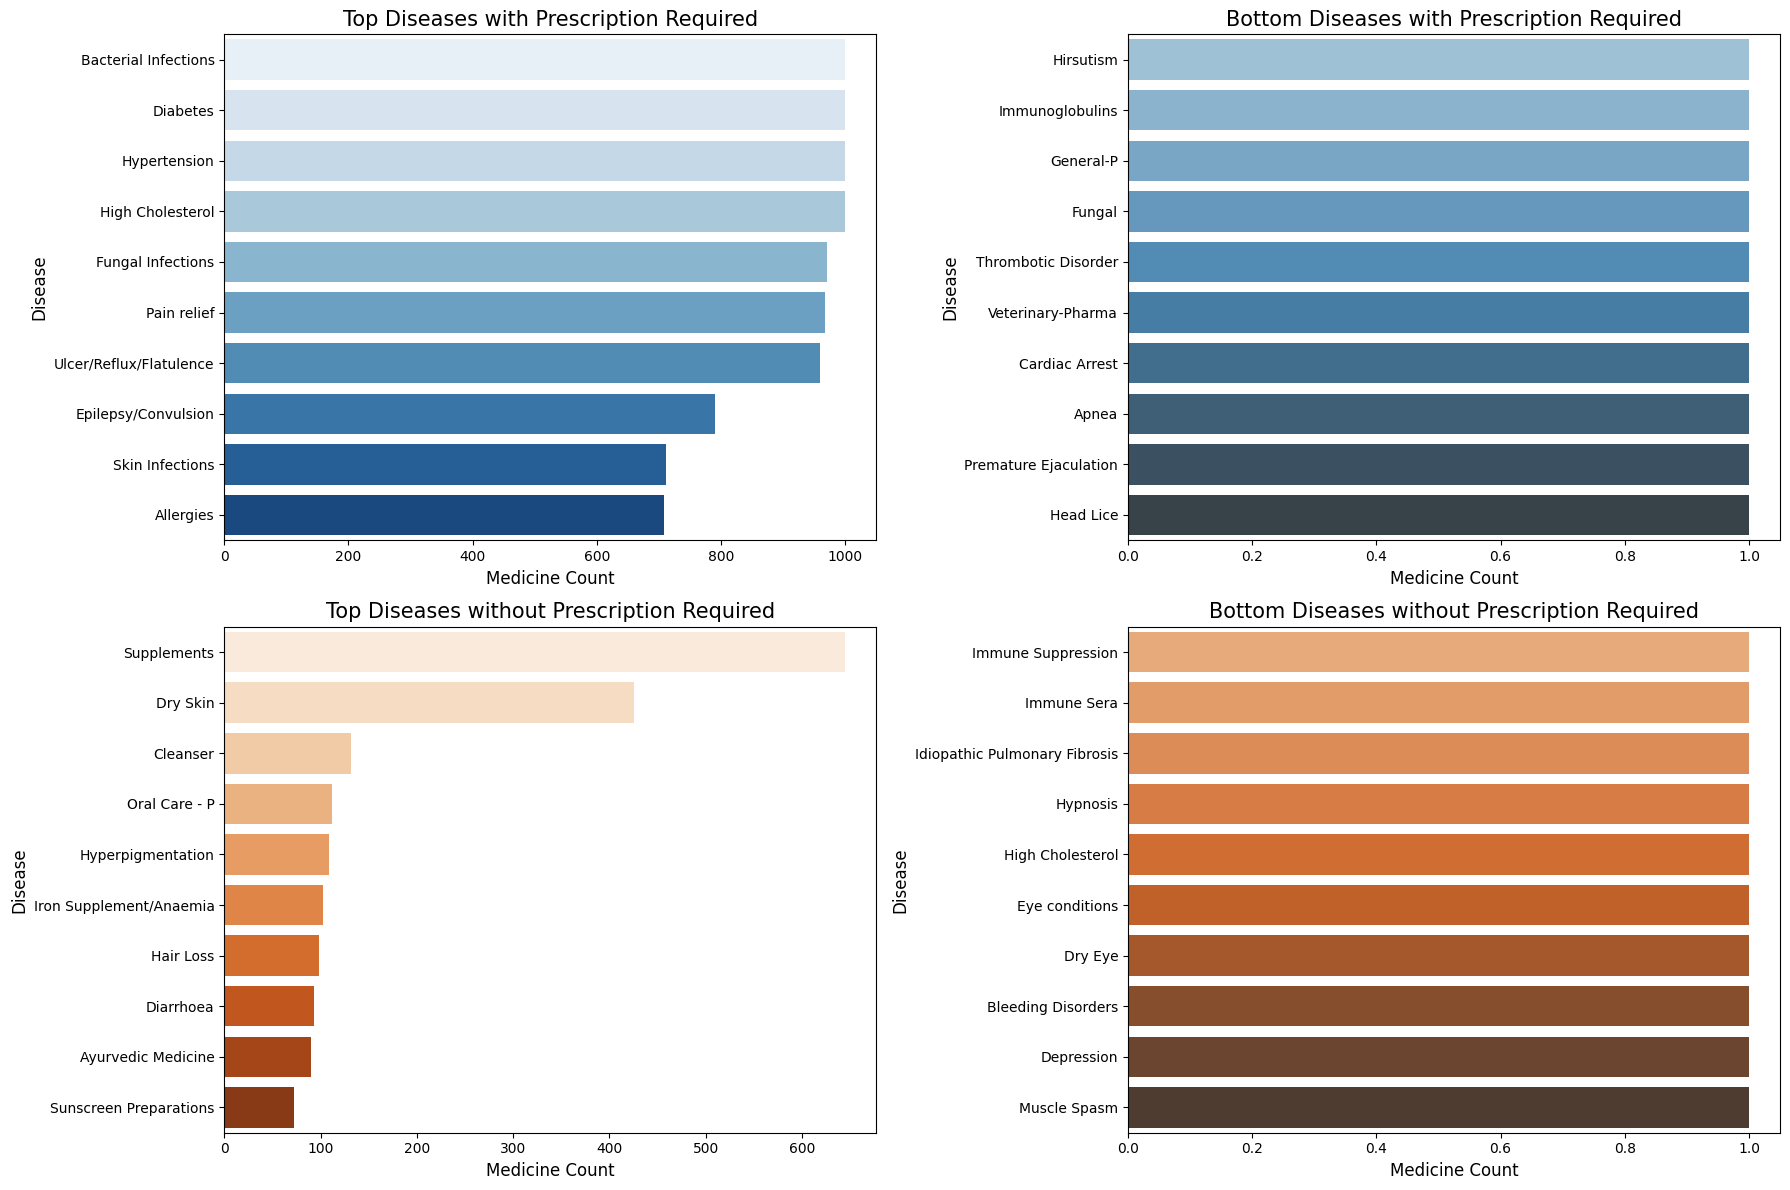

In [ ]:
# Group by Disease and Rx Required for  geting the count of medicines for each combination
disease_rx_counts = data.groupby(['Disease', 'Rx Required']).size().reset_index(name='Medicine Count')

# Separating diseases with Rx Required as True and False
disease_rx_true = disease_rx_counts[disease_rx_counts['Rx Required'] == True].sort_values(by='Medicine Count', ascending=False)
disease_rx_false = disease_rx_counts[disease_rx_counts['Rx Required'] == False].sort_values(by='Medicine Count', ascending=False)

# Top 10 diseases for Rx Required = True
top_diseases_rx_true = disease_rx_true.head(10)

# Bottom 10 diseases for Rx Required = True
bottom_diseases_rx_true = disease_rx_true.tail(10)

# Top 10 diseases for Rx Required = False
top_diseases_rx_false = disease_rx_false.head(10)

# Bottom 10 diseases for Rx Required = False
bottom_diseases_rx_false = disease_rx_false.tail(10)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.barplot(x='Medicine Count', y='Disease', data=top_diseases_rx_true, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Top Diseases with Prescription Required', fontsize=15)
axes[0, 0].set_xlabel('Medicine Count', fontsize=12)
axes[0, 0].set_ylabel('Disease', fontsize=12)

sns.barplot(x='Medicine Count', y='Disease', data=bottom_diseases_rx_true, ax=axes[0, 1], palette='Blues_d')
axes[0, 1].set_title('Bottom Diseases with Prescription Required', fontsize=15)
axes[0, 1].set_xlabel('Medicine Count', fontsize=12)
axes[0, 1].set_ylabel('Disease', fontsize=12)

sns.barplot(x='Medicine Count', y='Disease', data=top_diseases_rx_false, ax=axes[1, 0], palette='Oranges')
axes[1, 0].set_title('Top Diseases without Prescription Required', fontsize=15)
axes[1, 0].set_xlabel('Medicine Count', fontsize=12)
axes[1, 0].set_ylabel('Disease', fontsize=12)

sns.barplot(x='Medicine Count', y='Disease', data=bottom_diseases_rx_false, ax=axes[1, 1], palette='Oranges_d')
axes[1, 1].set_title('Bottom Diseases without Prescription Required', fontsize=15)
axes[1, 1].set_xlabel('Medicine Count', fontsize=12)
axes[1, 1].set_ylabel('Disease', fontsize=12)

plt.tight_layout()
plt.show()


#### Chart - 4

<ipython-input-15-0a75fe012354>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Disease', data=disease_discount_sorted, palette='coolwarm')


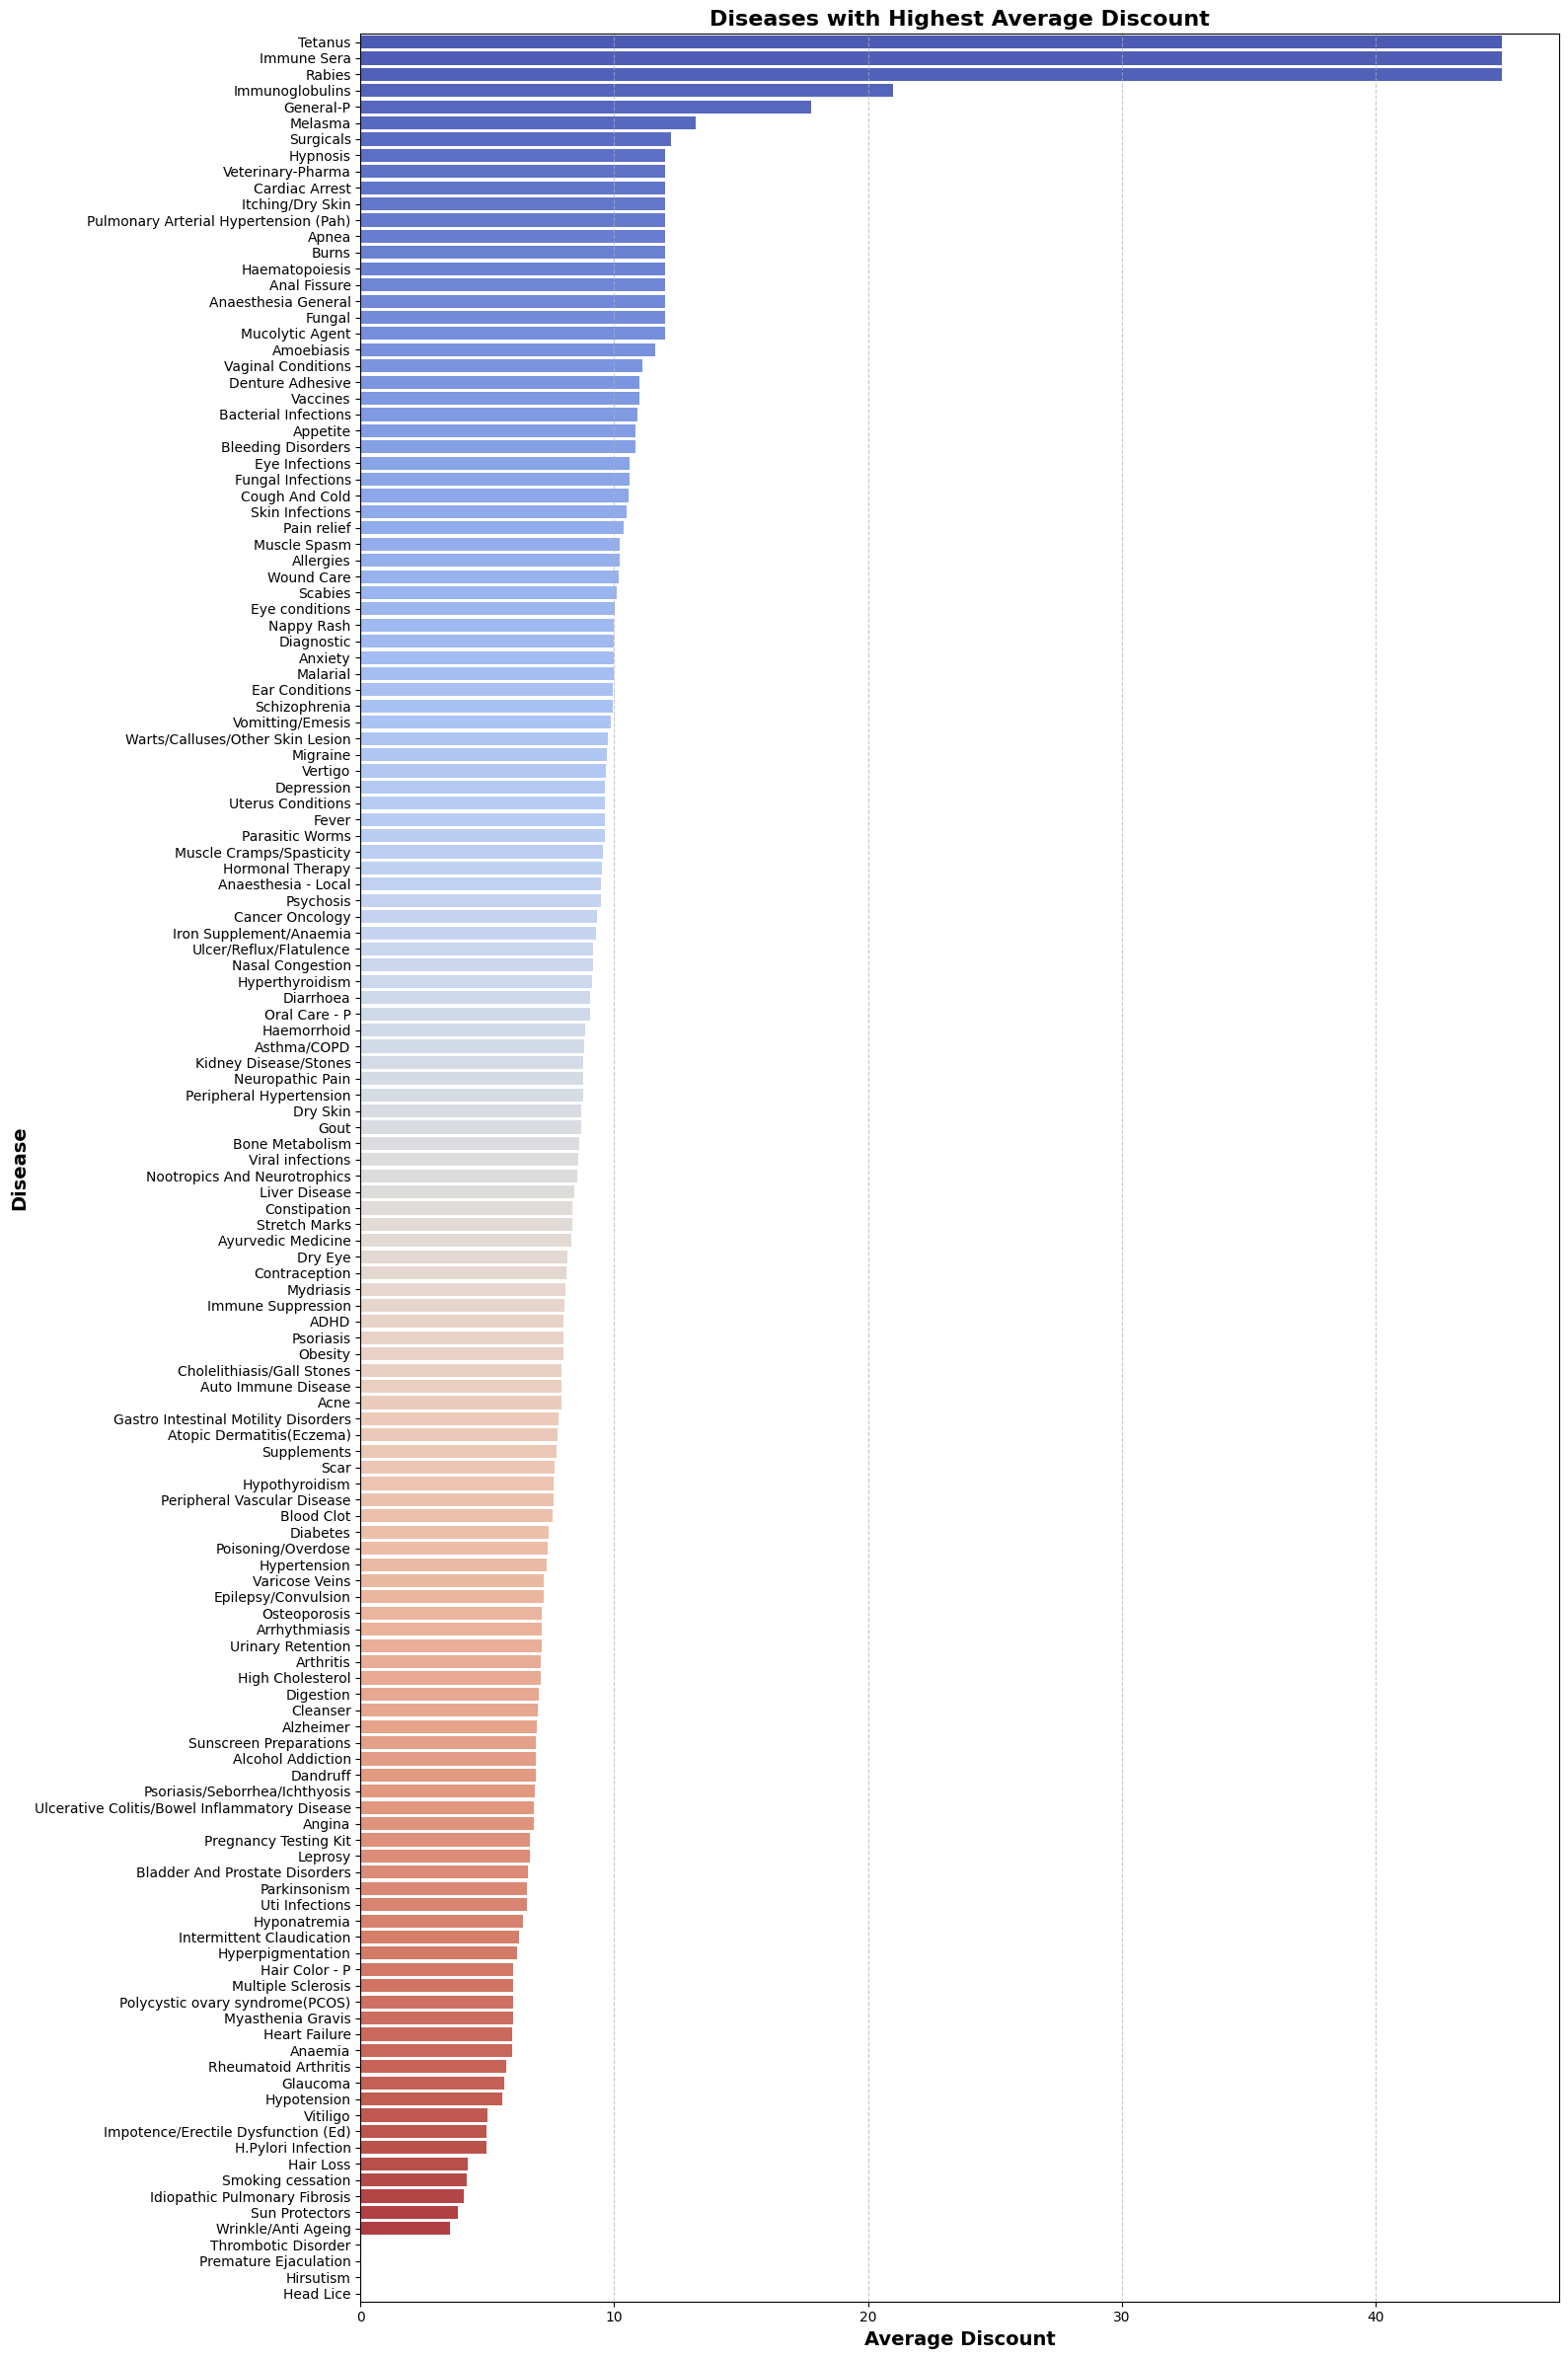

In [ ]:


# Grouping by Disease and calculating the average Discount
disease_discount = data.groupby('Disease')['Discount'].mean().reset_index()

# Sorting the diseases by Discount in descending order
disease_discount_sorted = disease_discount.sort_values(by='Discount', ascending=False)

plt.figure(figsize=(16, 24))
sns.barplot(x='Discount', y='Disease', data=disease_discount_sorted, palette='coolwarm')

plt.xlabel('Average Discount', fontsize=14, fontweight='bold')
plt.ylabel('Disease', fontsize=14, fontweight='bold')
plt.title('Diseases with Highest Average Discount', fontsize=16, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Chart - 5

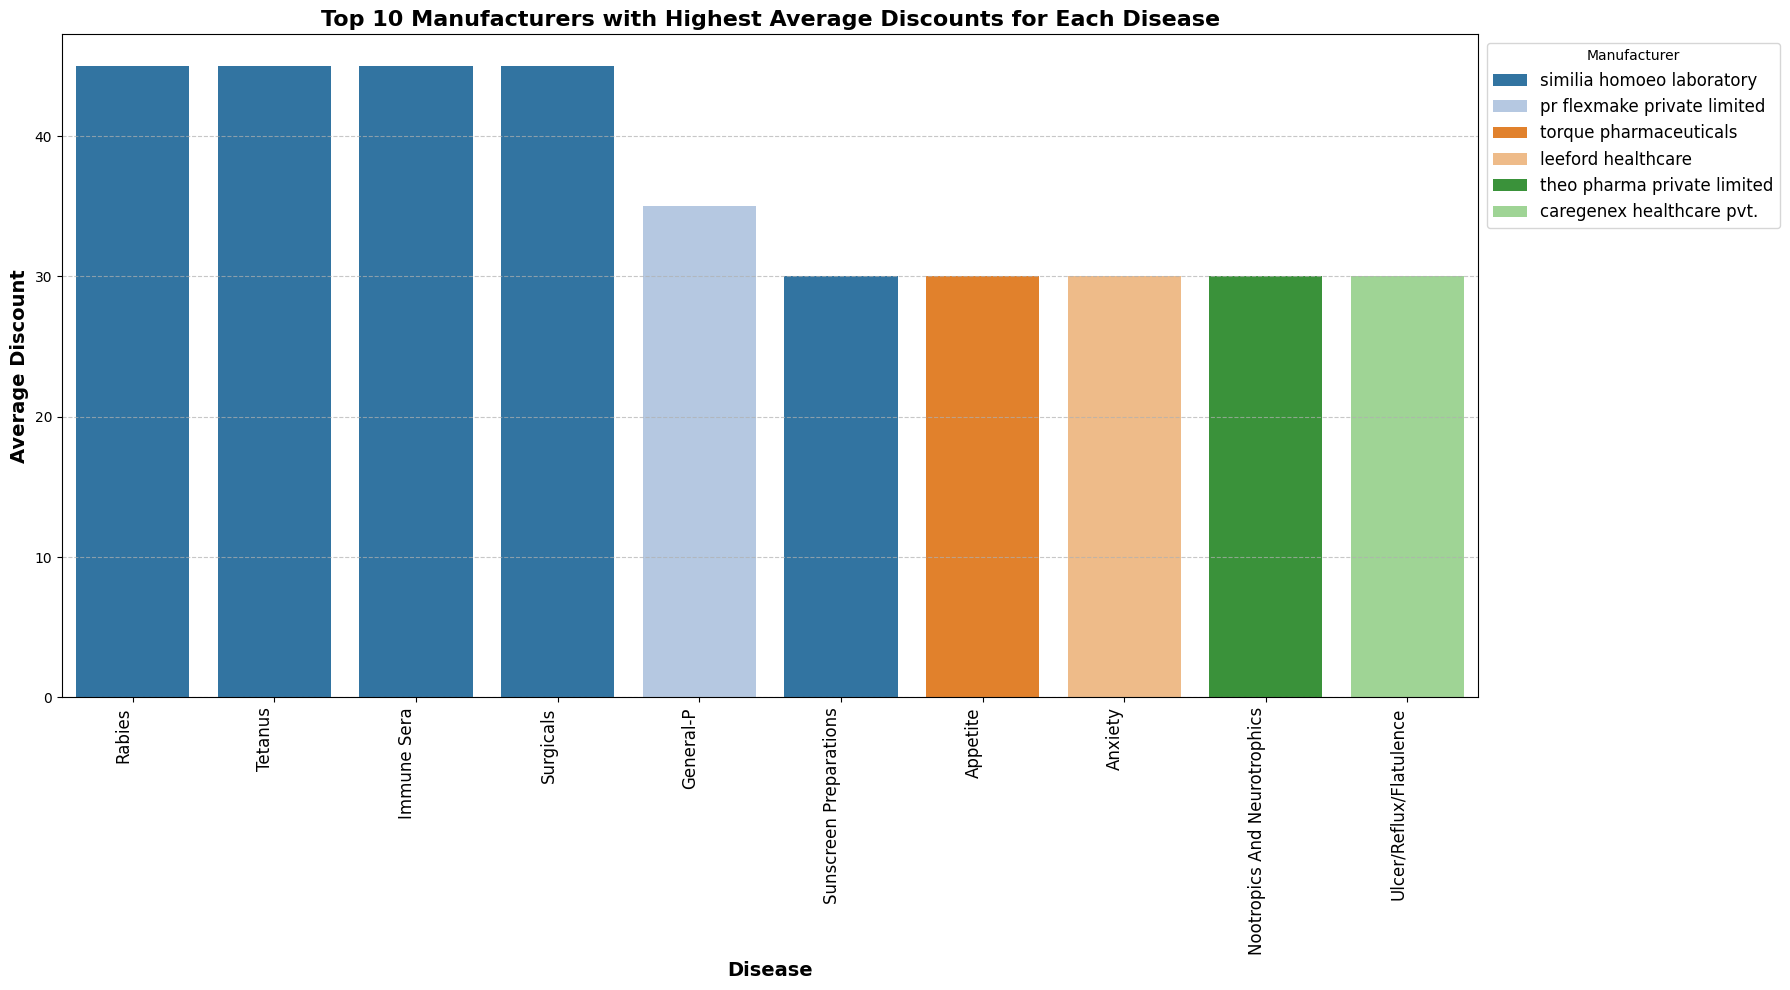

In [ ]:


# Grouping by 'Disease' and 'Manufacturer', and calculating the average discount
disease_manufacturer_discount = data.groupby(['Disease', 'Manufacturer'])['Discount'].mean().reset_index()

# Sorting the data based on 'Discount' in descending order
sorted_discount = disease_manufacturer_discount.sort_values(by='Discount', ascending=False)

# Selecting the top 10 manufacturers with the highest discounts
top_10_discount = sorted_discount.head(10)

plt.figure(figsize=(18, 10))
sns.barplot(x='Disease', y='Discount', hue='Manufacturer', data=top_10_discount, palette='tab20')

plt.xlabel('Disease', fontsize=14, fontweight='bold')
plt.ylabel('Average Discount', fontsize=14, fontweight='bold')
plt.title('Top 10 Manufacturers with Highest Average Discounts for Each Disease', fontsize=16, fontweight='bold')

plt.xticks(rotation=90, ha='right', fontsize=12)

plt.legend(title='Manufacturer', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Chart - 6

<ipython-input-17-37a6e060948e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Disease', data=average_price_by_disease_sorted, palette='viridis')


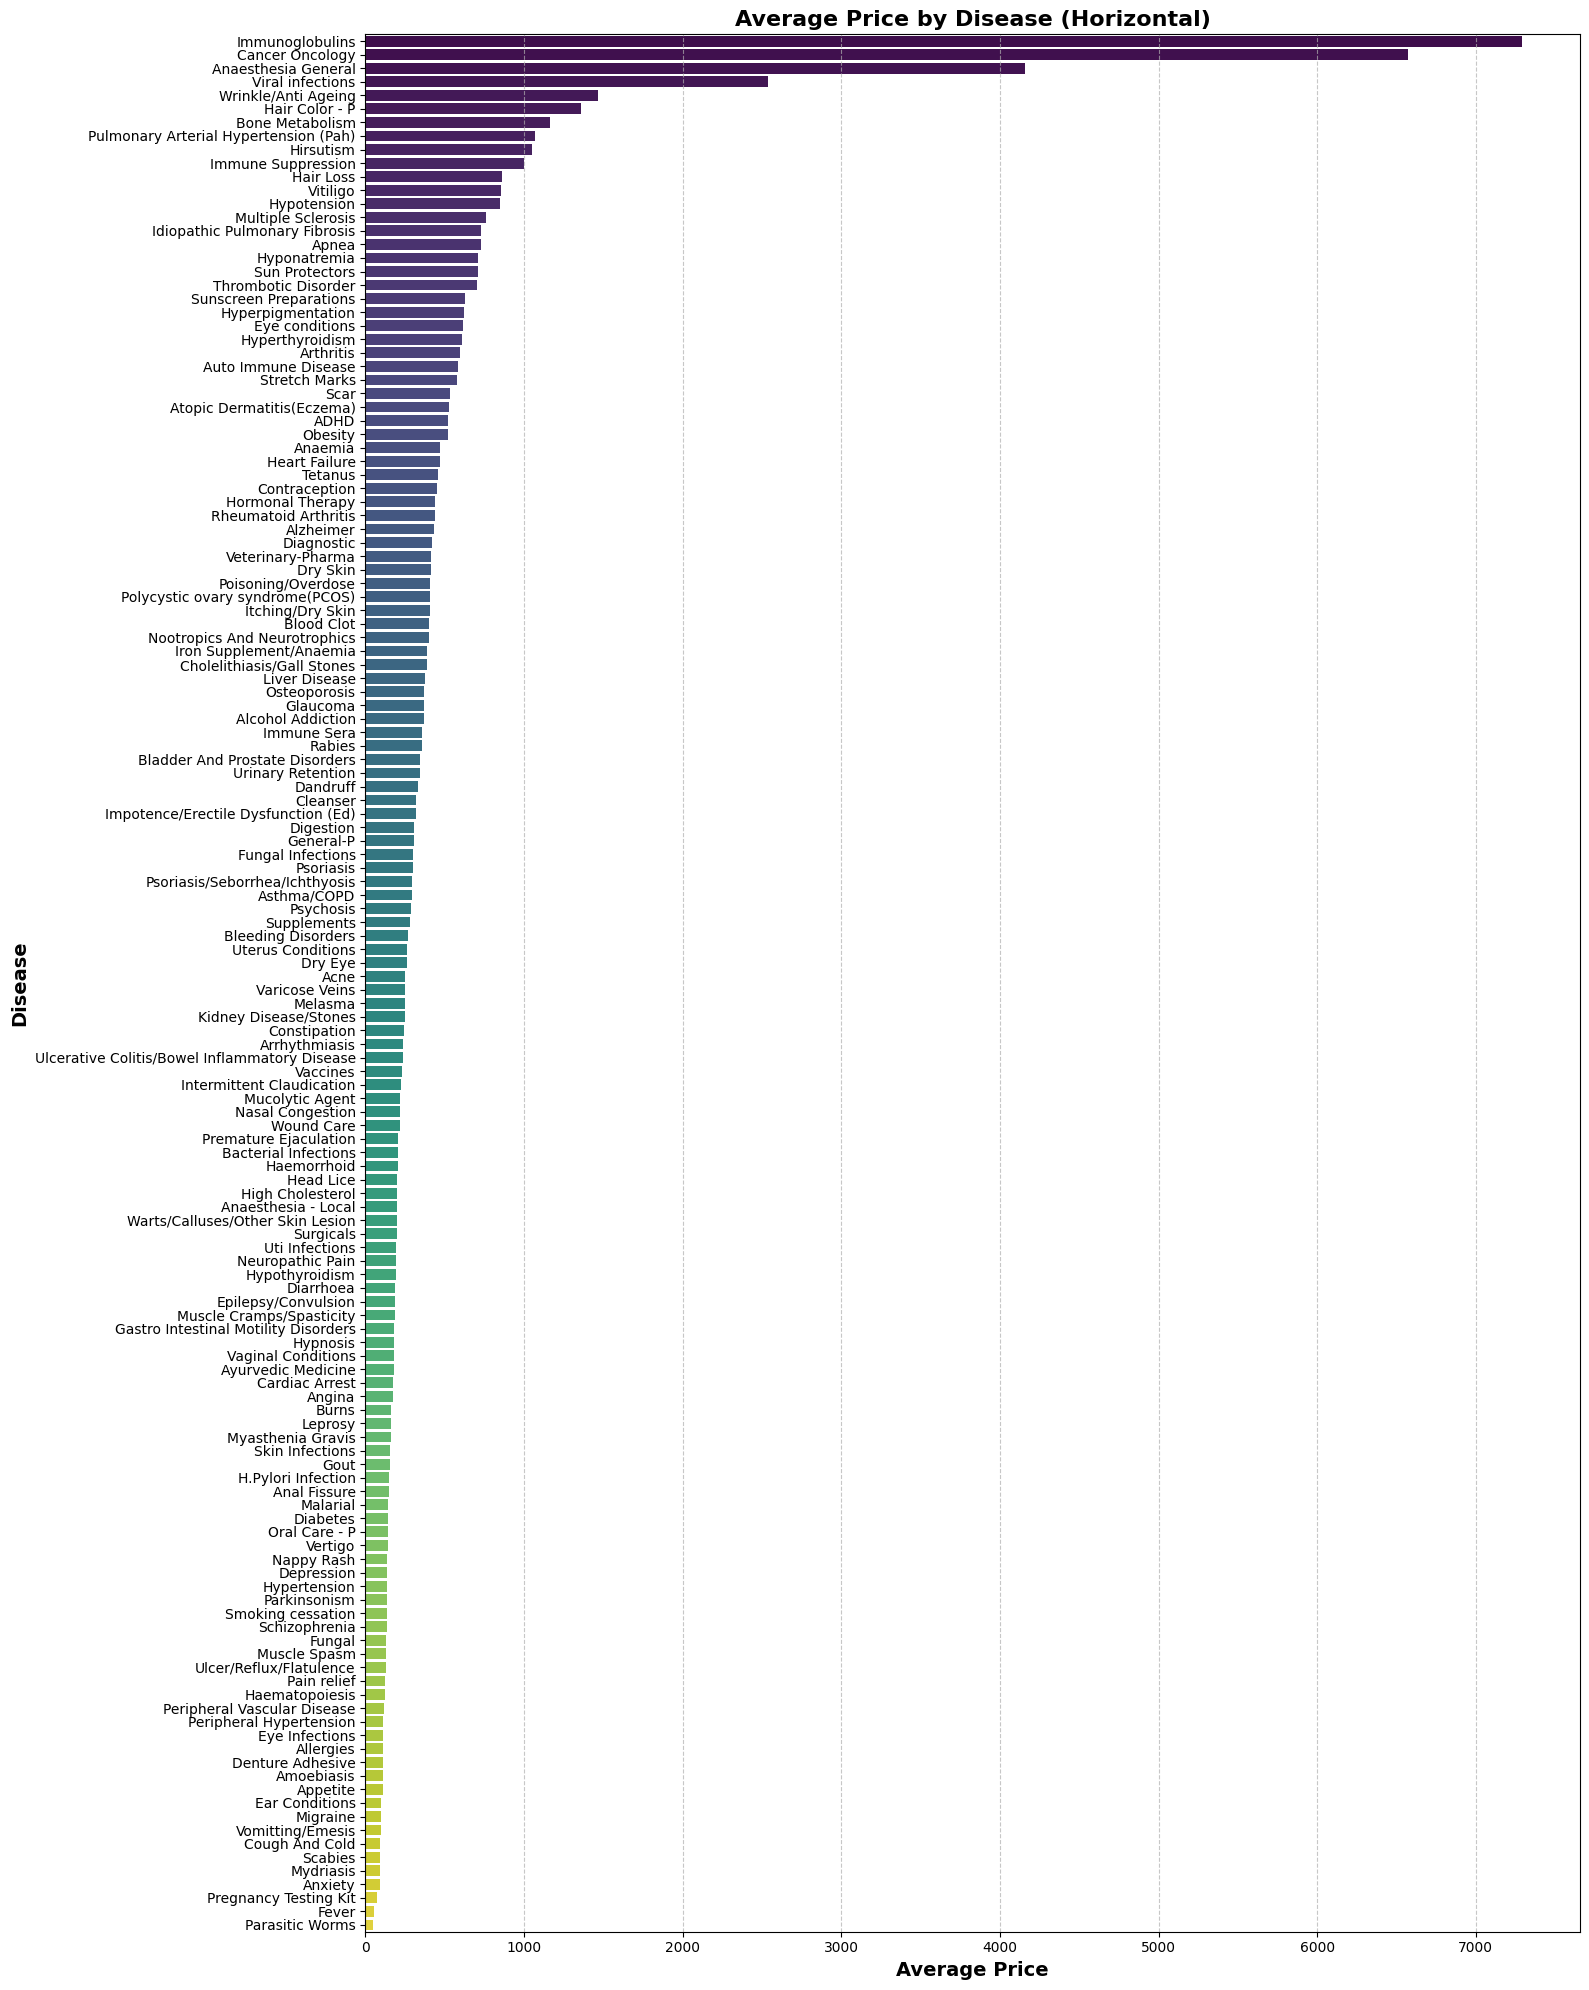

In [ ]:

# Grouping by 'Disease' and calculating the average price for each disease
average_price_by_disease = data.groupby('Disease')['Price'].mean().reset_index()

# Sorting the results in descending order to show the diseases with the highest average price
average_price_by_disease_sorted = average_price_by_disease.sort_values(by='Price', ascending=False)

plt.figure(figsize=(16, 20))
sns.barplot(x='Price', y='Disease', data=average_price_by_disease_sorted, palette='viridis')

plt.xlabel('Average Price', fontsize=14, fontweight='bold')
plt.ylabel('Disease', fontsize=14, fontweight='bold')
plt.title('Average Price by Disease (Horizontal)', fontsize=16, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Chart - 7

<ipython-input-18-99a53c94b223>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country of Origin', y='Price', data=country_price_discount, palette='Blues_d', ax=axes[0])
<ipython-input-18-99a53c94b223>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country of Origin', y='Discount', data=country_price_discount, palette='Oranges_d', ax=axes[1])


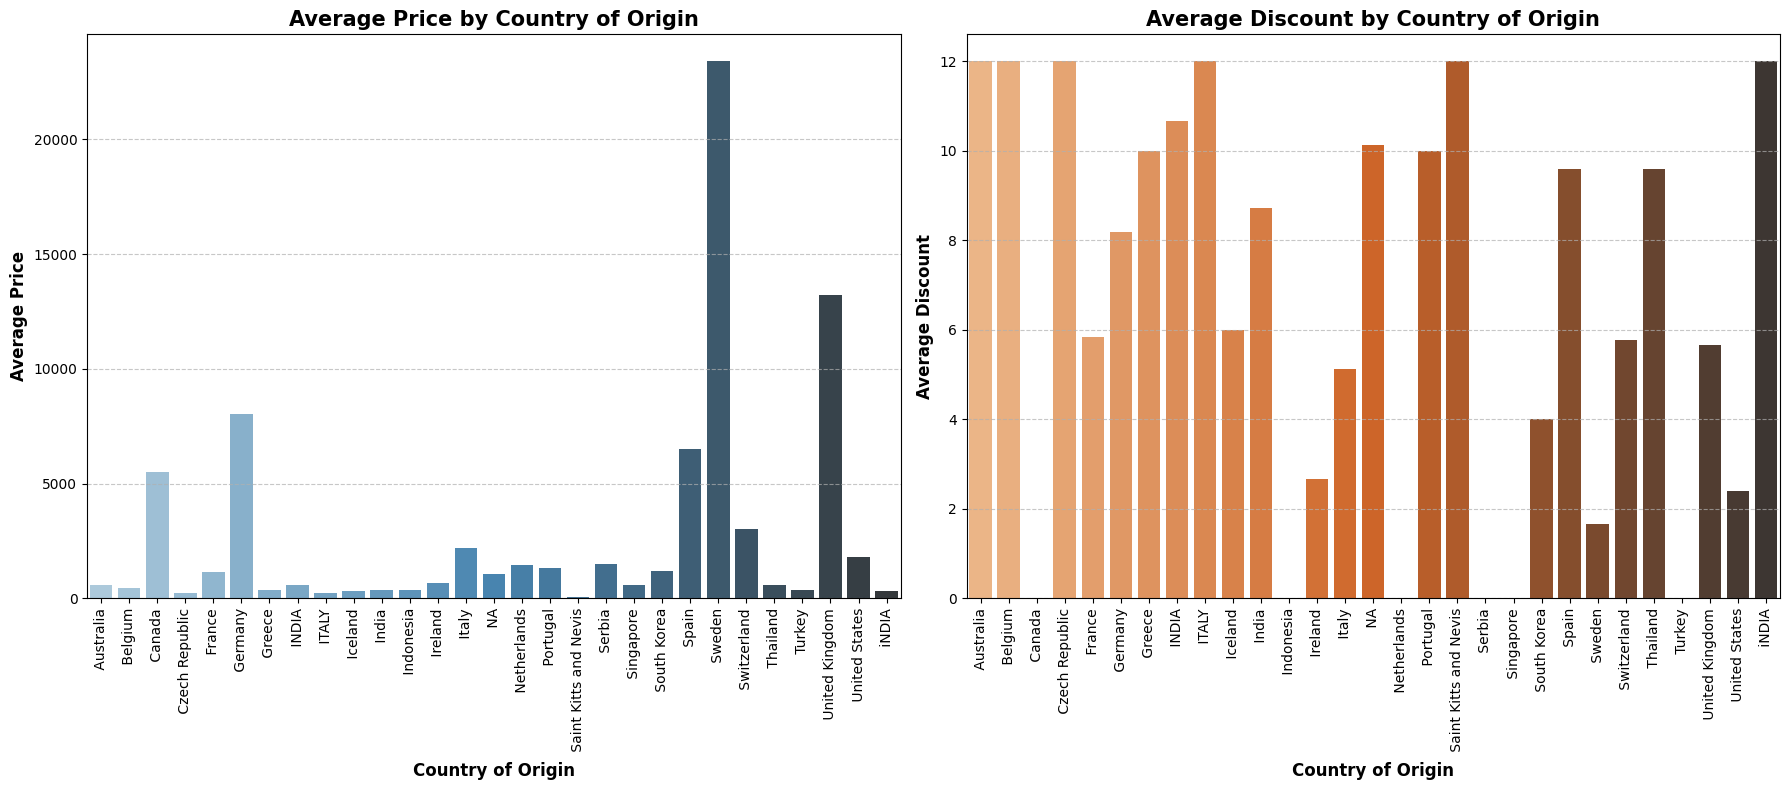

In [ ]:
country_price_discount = data.groupby('Country of Origin')[['Price', 'Discount']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

sns.barplot(x='Country of Origin', y='Price', data=country_price_discount, palette='Blues_d', ax=axes[0])
axes[0].set_xlabel('Country of Origin', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Price', fontsize=12, fontweight='bold')
axes[0].set_title('Average Price by Country of Origin', fontsize=15, fontweight='bold')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x='Country of Origin', y='Discount', data=country_price_discount, palette='Oranges_d', ax=axes[1])
axes[1].set_xlabel('Country of Origin', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Discount', fontsize=12, fontweight='bold')
axes[1].set_title('Average Discount by Country of Origin', fontsize=15, fontweight='bold')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


#### Chart - 9

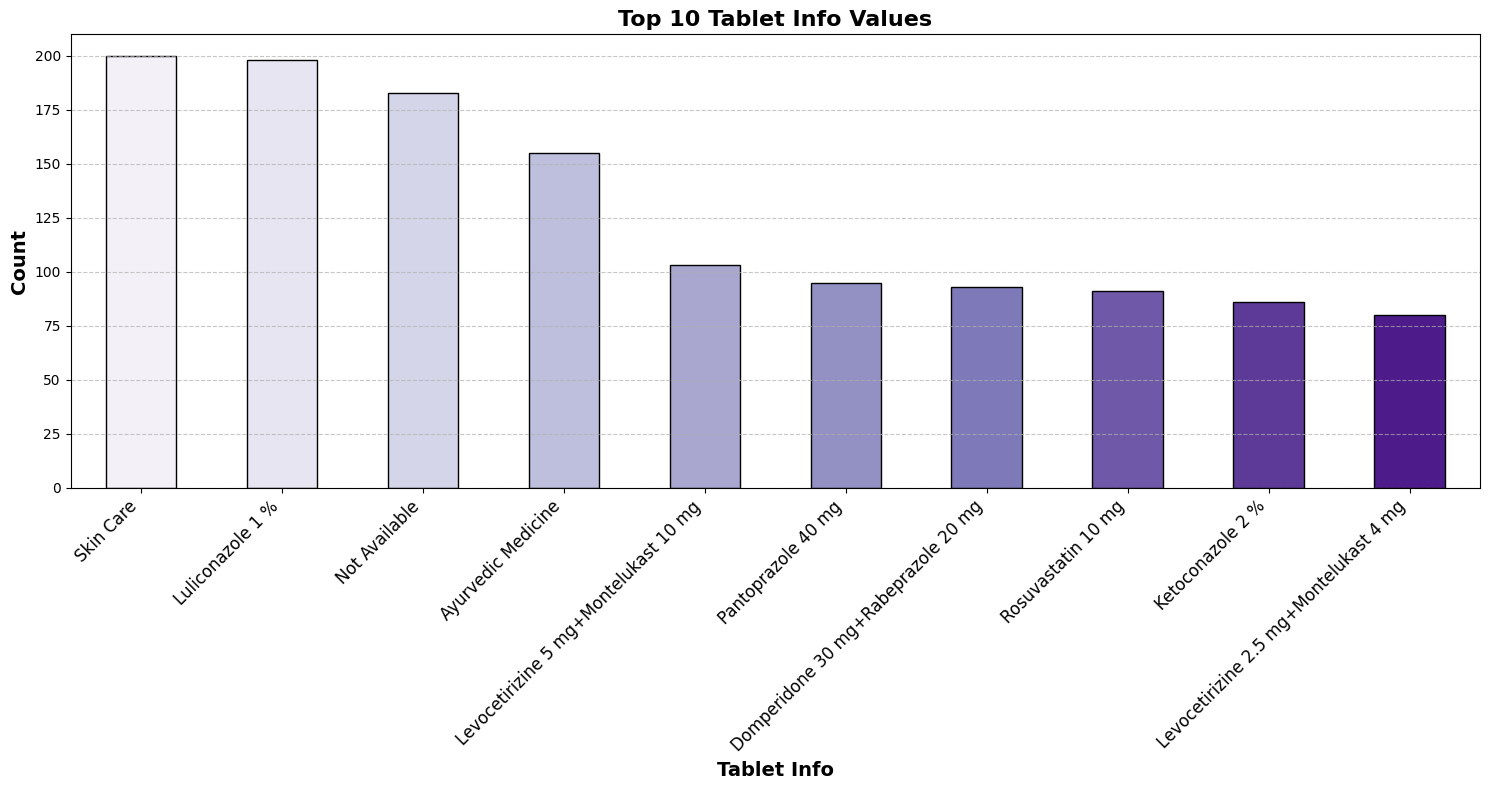

In [ ]:
# extracting the top 10 most frequent values in 'Tablet Info'
top_10_tablet_info = data['Tablet Info'].value_counts().head(10)
# Plotting the top 10 Tablet Info values
plt.figure(figsize=(15, 8))
top_10_tablet_info.plot(kind='bar', color=sns.color_palette("Purples", 10), edgecolor='black')
plt.xlabel('Tablet Info', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Top 10 Tablet Info Values', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


#### Chart - 10

In [ ]:
# Grouping data by Country of Origin and Disease, counting tablets
disease_table = data.groupby(['Country of Origin', 'Disease'])['Tablet Name'].count().reset_index()

# Renaming columns for clarity
disease_table.columns = ['Country of Origin', 'Disease', 'Count of Tablets']

# Sorting by Count of Tablets in descending order
disease_table = disease_table.sort_values(['Count of Tablets'], ascending=False)

from tabulate import tabulate

# Converting DataFrame to a formatted table
print(tabulate(disease_table, headers='keys', tablefmt='grid', showindex=False))


+-----------------------+-----------------------------------------------+--------------------+
| Country of Origin     | Disease                                       |   Count of Tablets |
+=======================+===============================================+====================+
| India                 | Supplements                                   |               1000 |
+-----------------------+-----------------------------------------------+--------------------+
| India                 | Hypertension                                  |                999 |
+-----------------------+-----------------------------------------------+--------------------+
| India                 | Pain relief                                   |                999 |
+-----------------------+-----------------------------------------------+--------------------+
| India                 | Bacterial Infections                          |                998 |
+-----------------------+-------------------------

#### Chart - 11

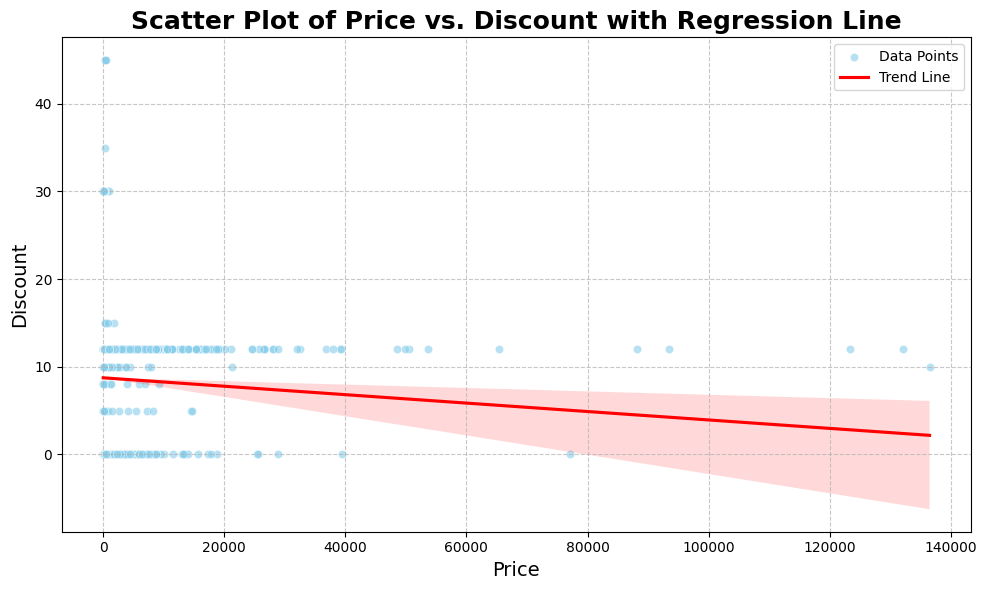

In [ ]:

# plotting Scatter plot with regression line to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Discount', data=data, color='skyblue', alpha=0.6, label='Data Points')
# Adding regression line
sns.regplot(x='Price', y='Discount', data=data, scatter=False, color='red', label='Trend Line')
plt.title('Scatter Plot of Price vs. Discount with Regression Line', fontsize=18, fontweight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Discount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Best Value for Money Country:   Saint Kitts and Nevis
Average Price:  68.0
Average Discount:  12.0
Value Score:  0.17647058823529413


<ipython-input-22-af90a6a05b5c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country of Origin', y='Value_Score', data=average_values, palette='Blues_d')


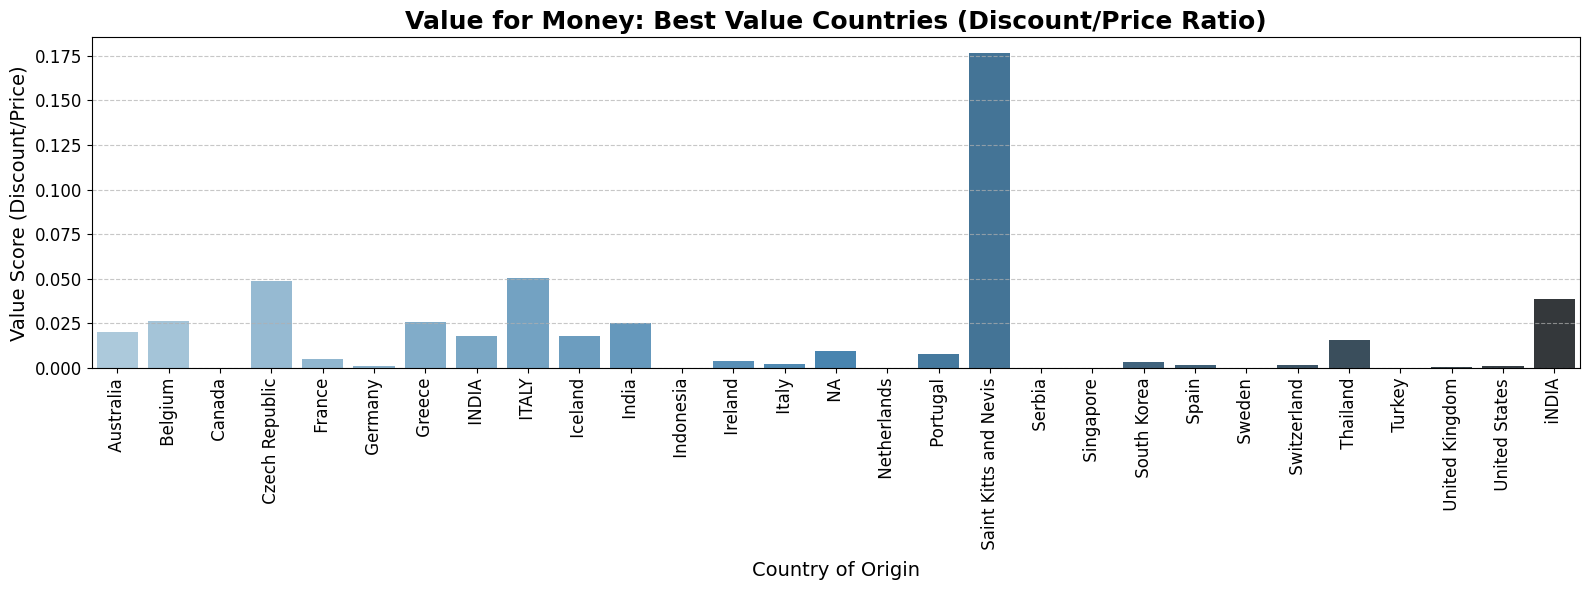

In [ ]:
#  Calculating average Price and Discount for each Country of Origin
average_values = data.groupby('Country of Origin')[['Price', 'Discount']].mean().reset_index()

#Calculating the "Value Score"
average_values['Value_Score'] = average_values['Discount'] / average_values['Price']

#Identifying the country with the highest Value Score (Best Value for Money)
best_value_country = average_values.loc[average_values['Value_Score'].idxmax()]


print("Best Value for Money Country: ", best_value_country['Country of Origin'])
print("Average Price: ", best_value_country['Price'])
print("Average Discount: ", best_value_country['Discount'])
print("Value Score: ", best_value_country['Value_Score'])

plt.figure(figsize=(16, 6))

sns.barplot(x='Country of Origin', y='Value_Score', data=average_values, palette='Blues_d')

plt.title('Value for Money: Best Value Countries (Discount/Price Ratio)', fontsize=18, fontweight='bold')
plt.xlabel('Country of Origin', fontsize=14)
plt.ylabel('Value Score (Discount/Price)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Chart - 13

<ipython-input-23-624ffbb419b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country of Origin', y='Price', data=data, palette='muted')


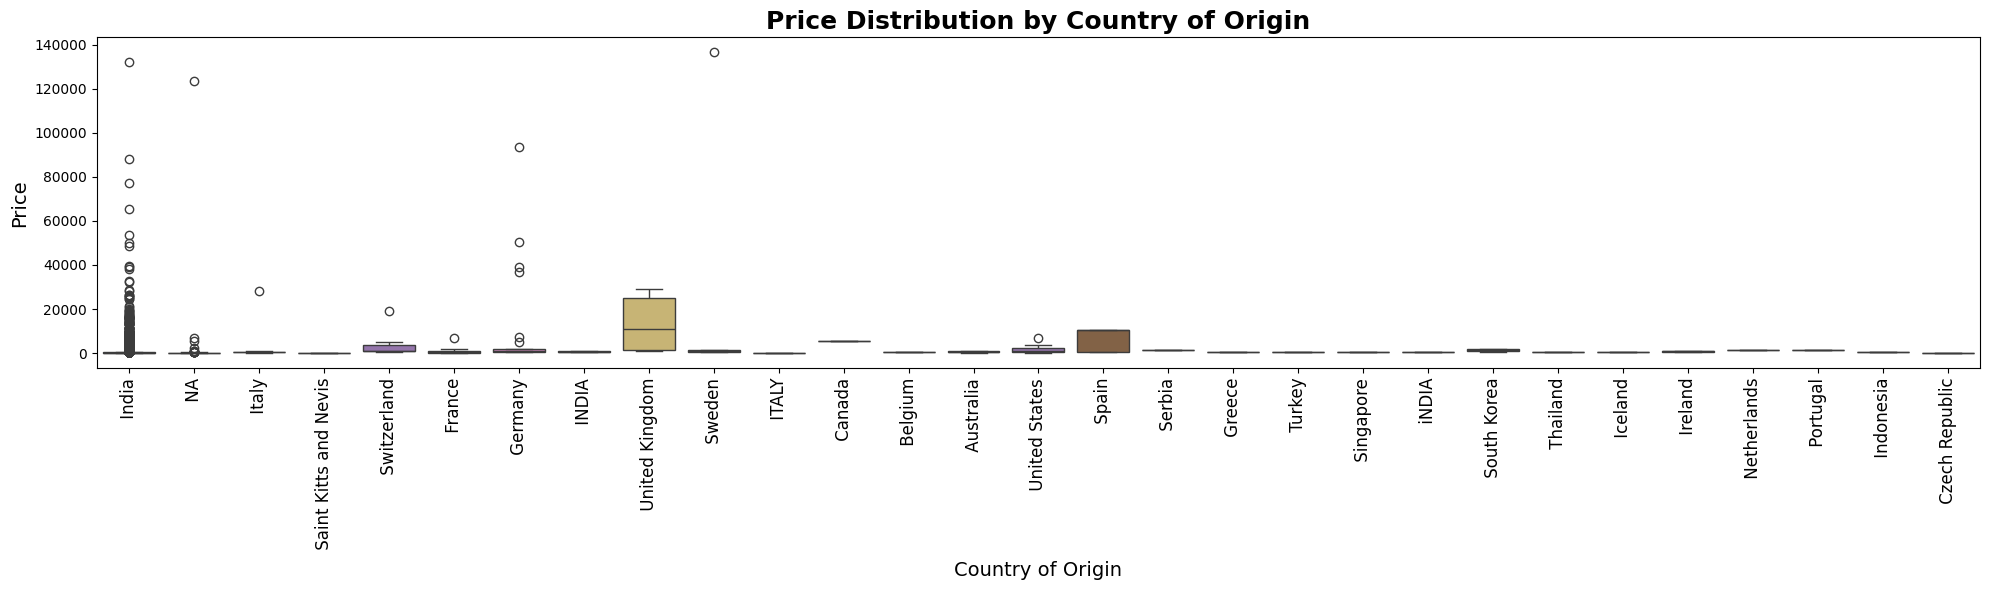

<ipython-input-23-624ffbb419b6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country of Origin', y='Discount', data=data, palette='muted')


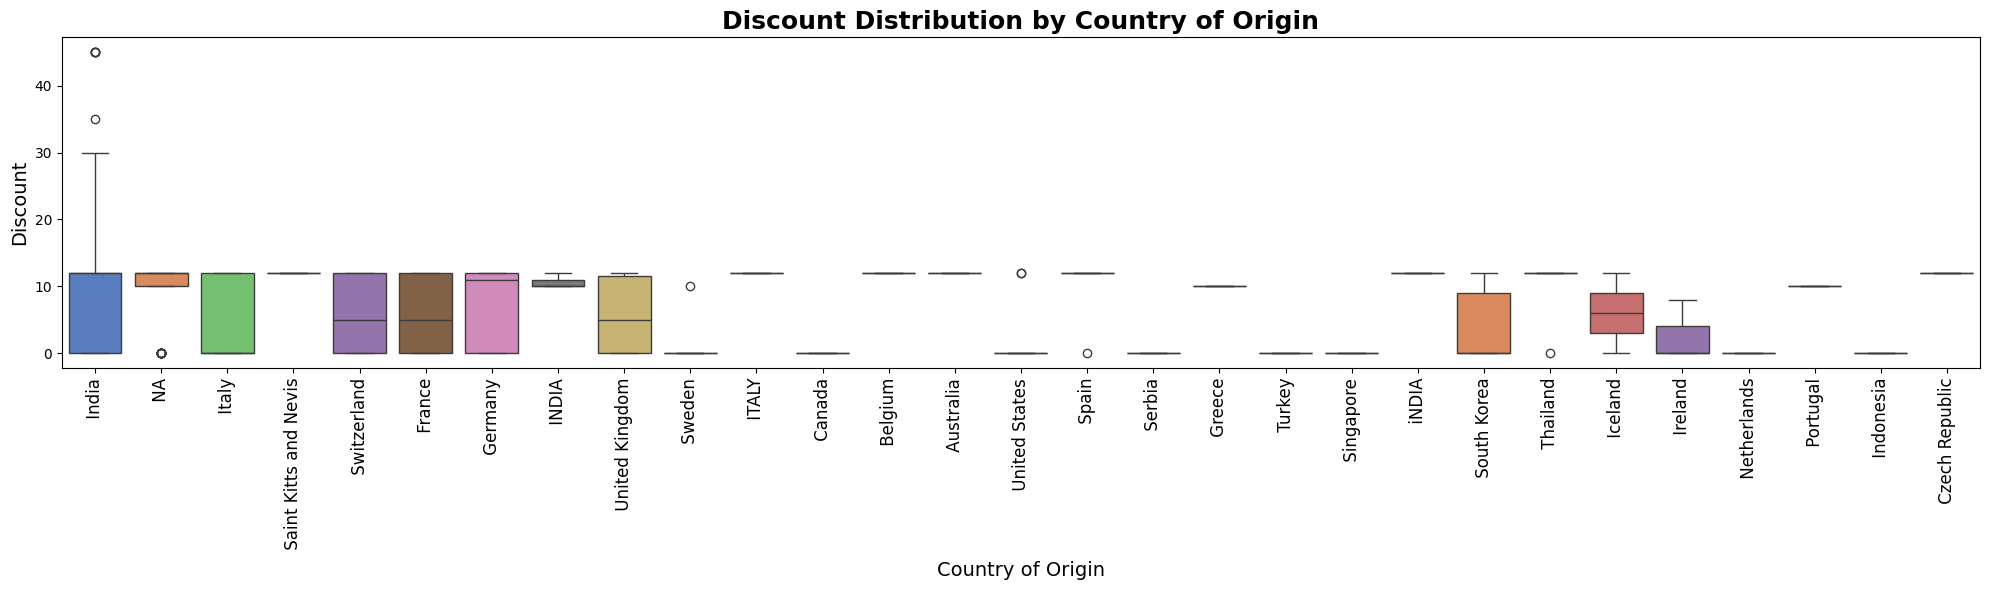

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Country of Origin', y='Price', data=data, palette='muted')
plt.title('Price Distribution by Country of Origin', fontsize=18, fontweight='bold')
plt.xlabel('Country of Origin', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 6))
sns.boxplot(x='Country of Origin', y='Discount', data=data, palette='muted')
plt.title('Discount Distribution by Country of Origin', fontsize=18, fontweight='bold')
plt.xlabel('Country of Origin', fontsize=14)
plt.ylabel('Discount', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


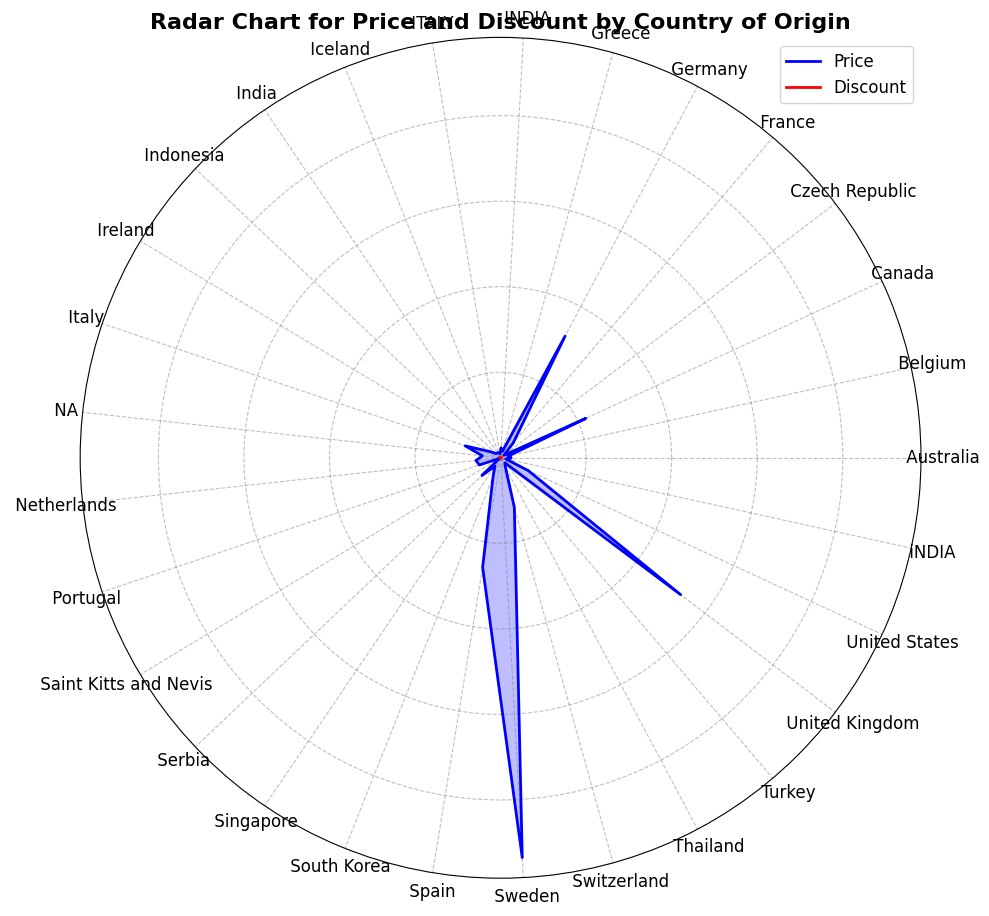

In [ ]:

# Preparing data for radar chart
countries = average_values['Country of Origin'].tolist()
price = average_values['Price'].tolist()
discount = average_values['Discount'].tolist()

angles = np.linspace(0, 2 * np.pi, len(countries), endpoint=False).tolist()
price += price[:1]
discount += discount[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(10, 14), subplot_kw=dict(polar=True))
ax.plot(angles, price, color='blue', linewidth=2, label='Price')
ax.fill(angles, price, color='blue', alpha=0.25)
ax.plot(angles, discount, color='red', linewidth=2, label='Discount')
ax.fill(angles, discount, color='red', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(countries, fontsize=12, color='black', rotation=45)
ax.set_title('Radar Chart for Price and Discount by Country of Origin', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)

ax.grid(color='grey', linestyle='--', alpha=0.5)
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()


#### Chart - 15 - Pair Plot

<ipython-input-25-ef2e03d74aec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Metric', x='Value', data=df_long, palette='Set2')


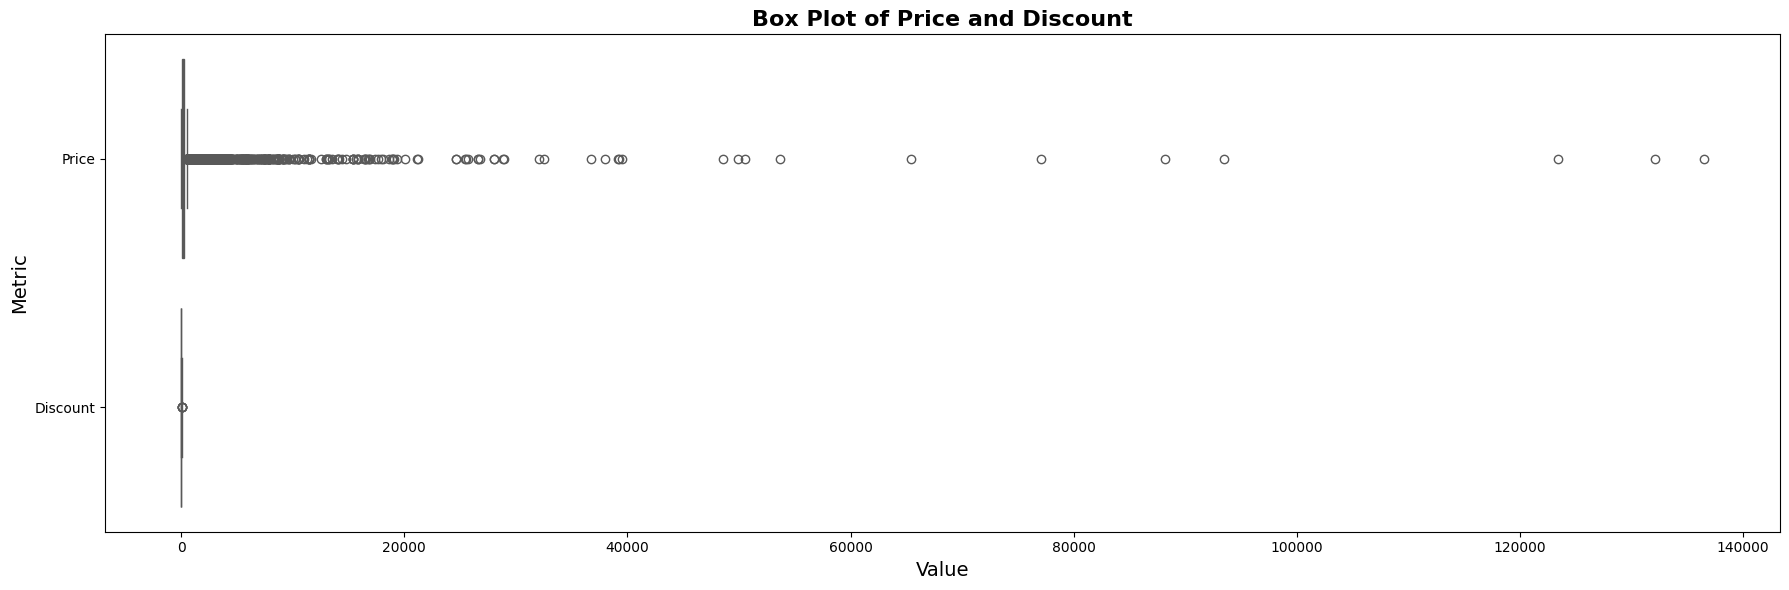

In [ ]:

# Reshaping the data to a long format suitable for boxplot
df_long = data[['Price', 'Discount']].melt(var_name='Metric', value_name='Value')
plt.figure(figsize=(18, 6))
sns.boxplot(y='Metric', x='Value', data=df_long, palette='Set2')
plt.title('Box Plot of Price and Discount', fontsize=16, fontweight='bold')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Metric', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

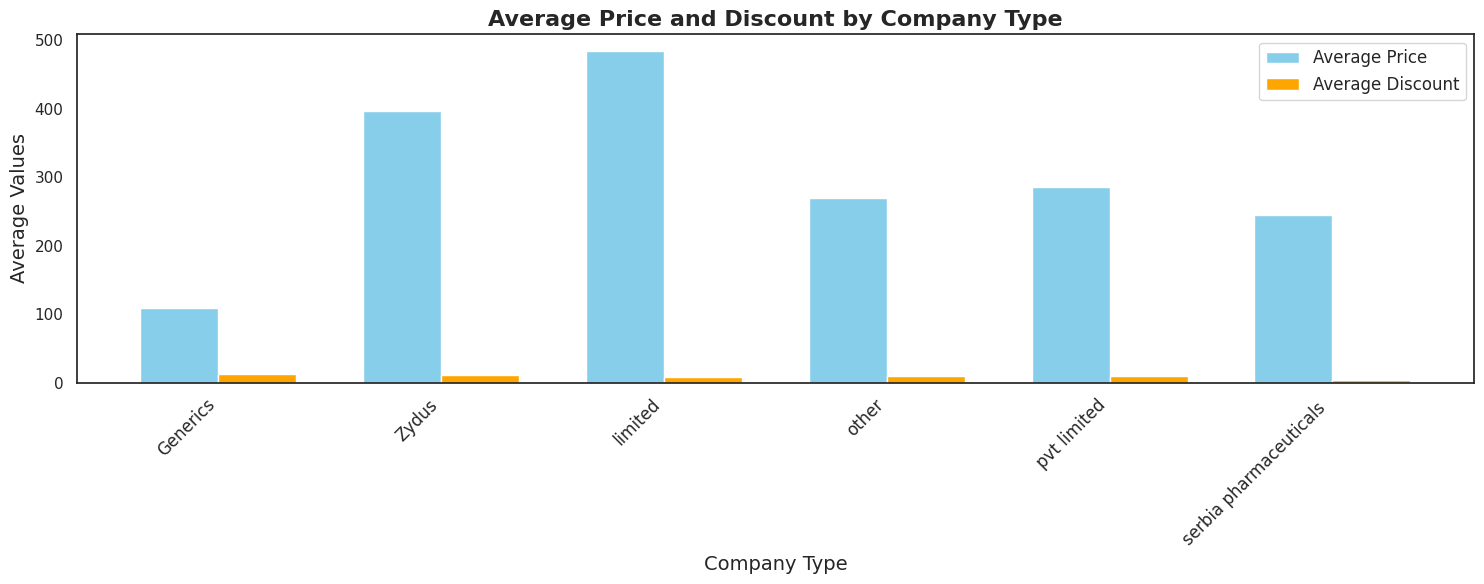

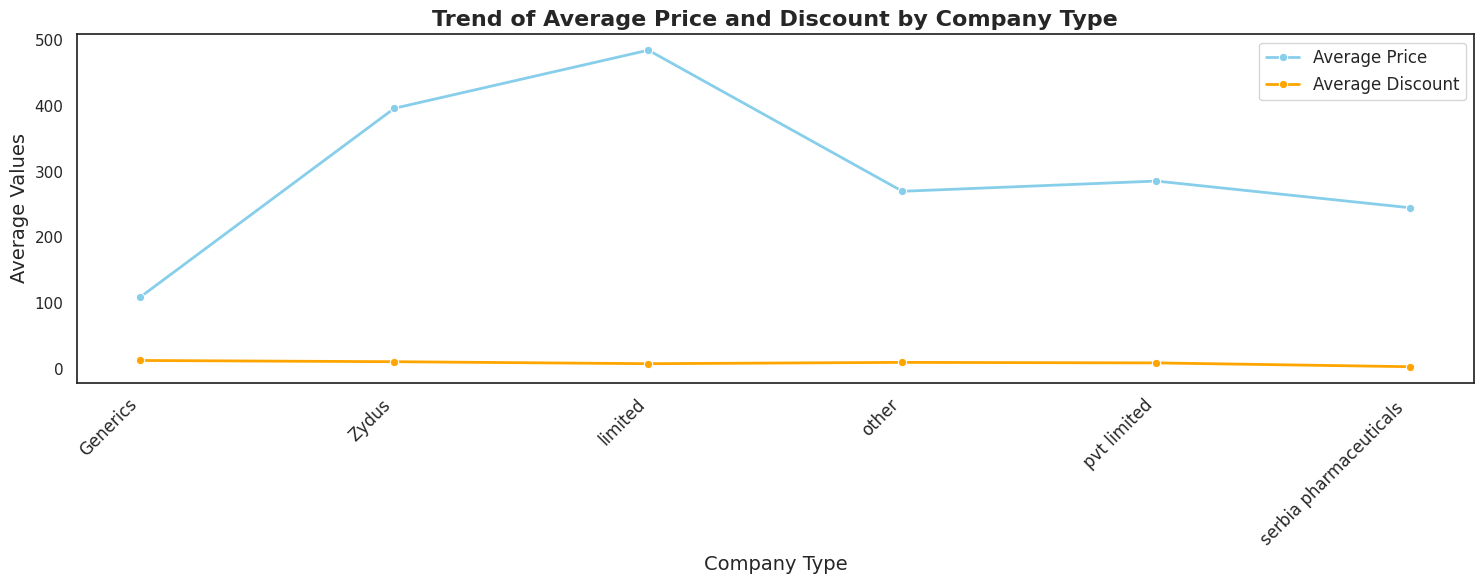

In [ ]:
sns.set(style="white")
data['company type'] = data['Comapny Type'].str.replace(r'\(.*?\)', 'generics', regex=True).str.strip()
company_stats = data.groupby('Comapny Type')[['Price', 'Discount']].mean().reset_index()

# 1. Grouped Bar Chart
plt.figure(figsize=(15, 6))
bar_width = 0.35
x = range(len(company_stats))
plt.bar(x, company_stats['Price'], width=bar_width, label='Average Price', color='skyblue')
plt.bar([p + bar_width for p in x], company_stats['Discount'], width=bar_width, label='Average Discount', color='orange')
plt.xlabel('Company Type', fontsize=14)
plt.ylabel('Average Values', fontsize=14)
plt.title('Average Price and Discount by Company Type', fontsize=16, fontweight='bold')
plt.xticks([p + bar_width / 2 for p in x], company_stats['Comapny Type'], rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 6))
sns.lineplot(data=company_stats, x='Comapny Type', y='Price', marker='o', label='Average Price', color='skyblue', linewidth=2)
sns.lineplot(data=company_stats, x='Comapny Type', y='Discount', marker='o', label='Average Discount', color='orange', linewidth=2)
plt.xlabel('Company Type', fontsize=14)
plt.ylabel('Average Values', fontsize=14)
plt.title('Trend of Average Price and Discount by Company Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


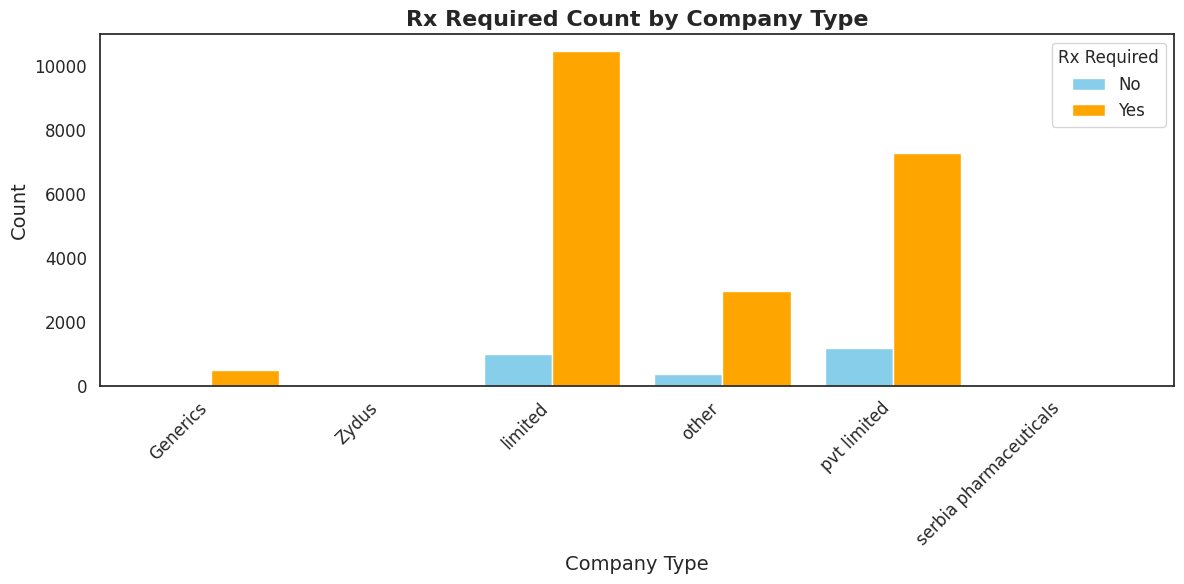

In [ ]:
sns.set(style="white")
rx_counts = data.groupby(['company type', 'Rx Required']).size().reset_index(name='Count')
rx_pivot = rx_counts.pivot(index='company type', columns='Rx Required', values='Count').fillna(0)
ax = rx_pivot.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'], width=0.8)
plt.title('Rx Required Count by Company Type', fontsize=16, fontweight='bold')
plt.xlabel('Company Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
ax.grid(False)
plt.legend(title='Rx Required', labels=['No', 'Yes'], fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


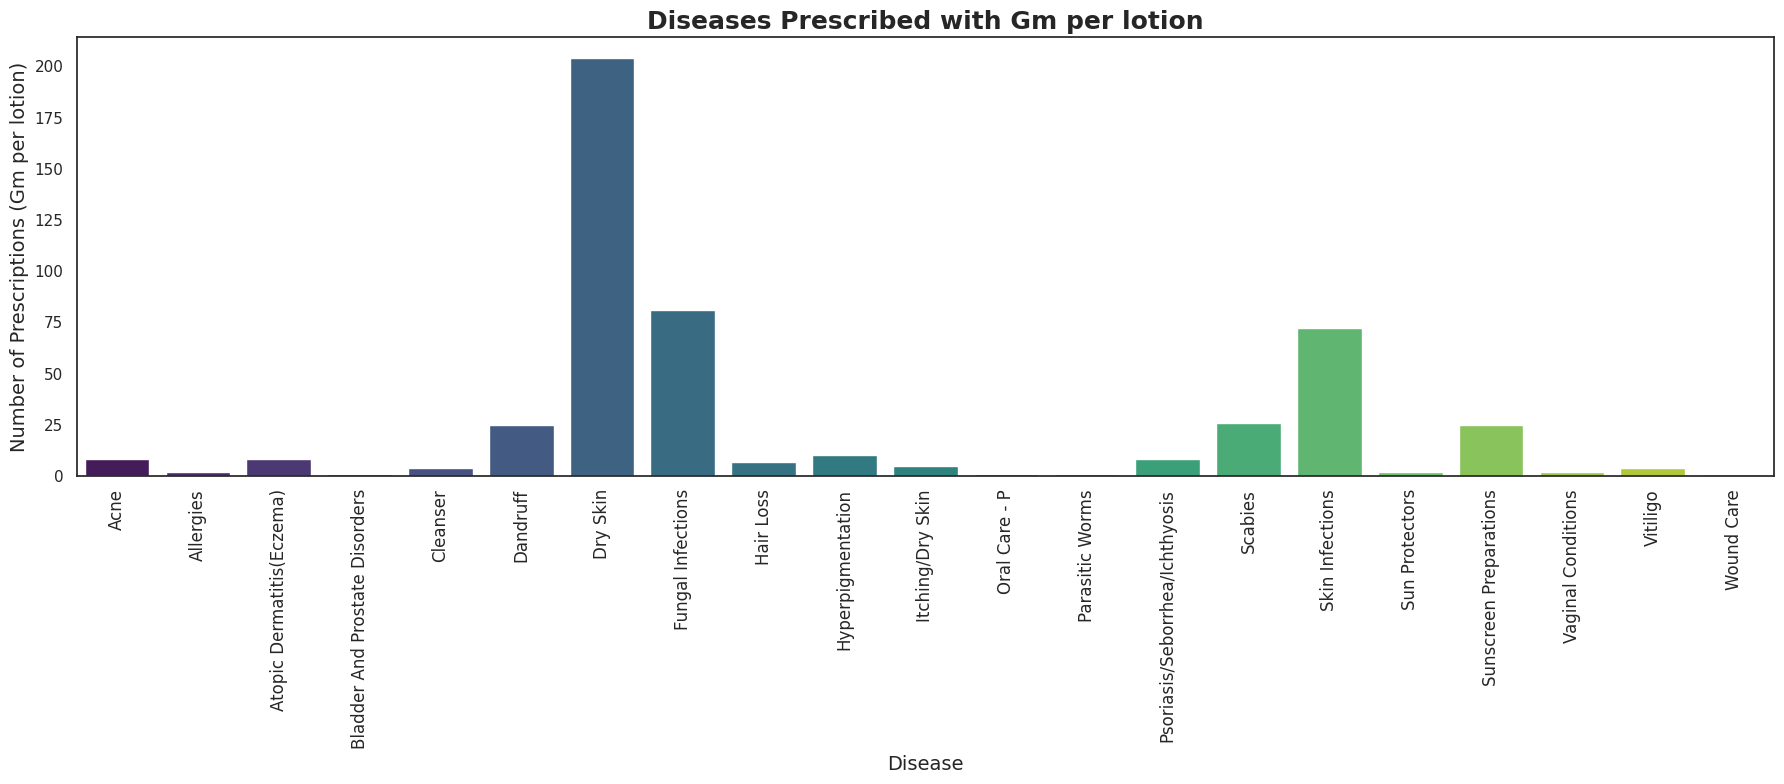

<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


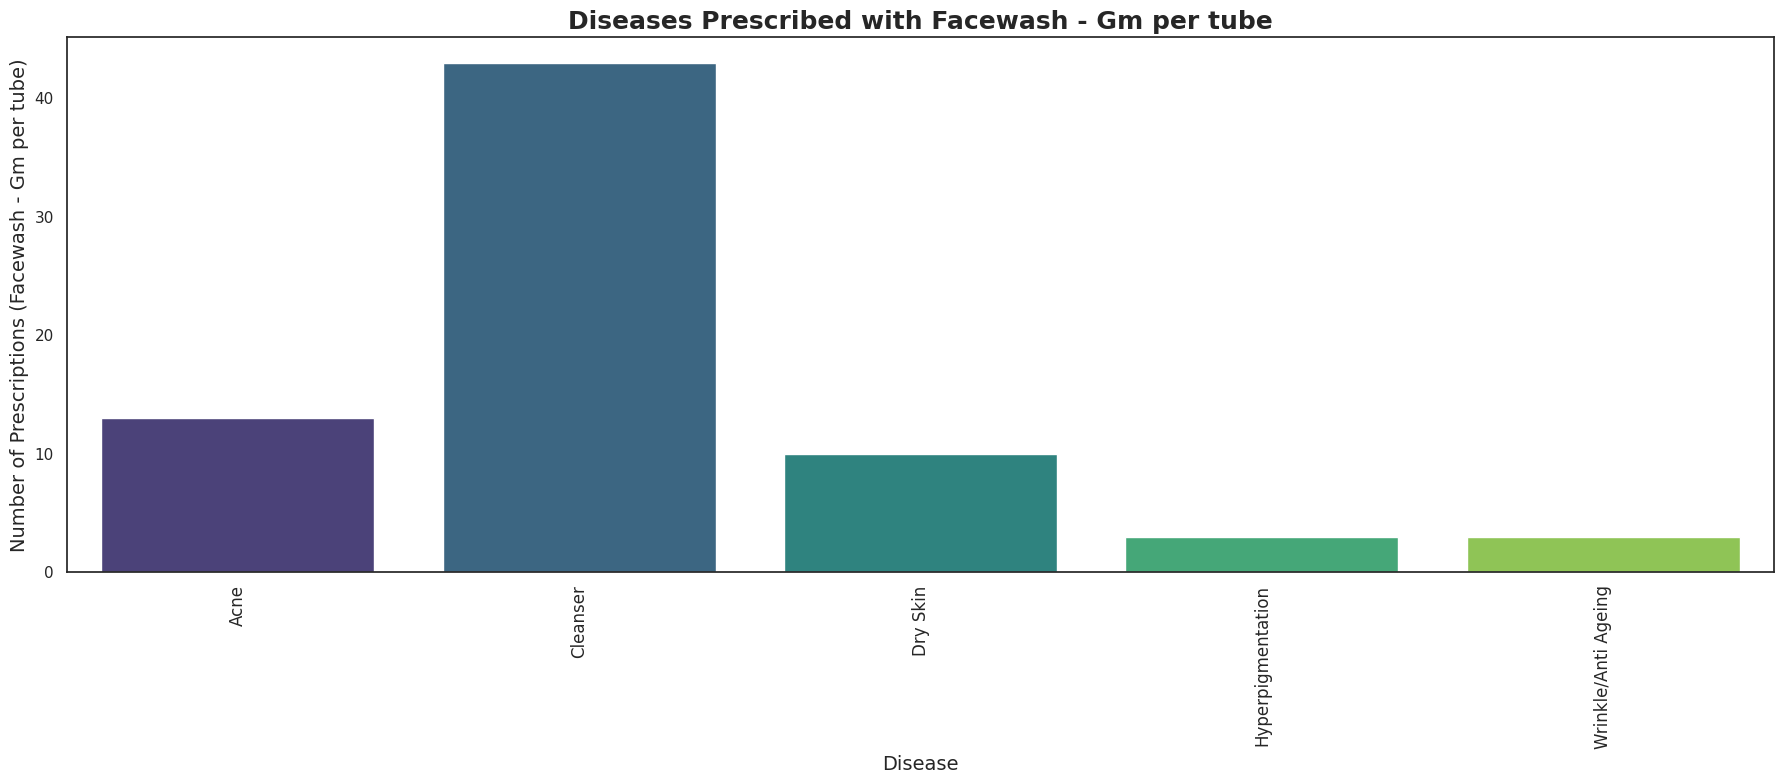

<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


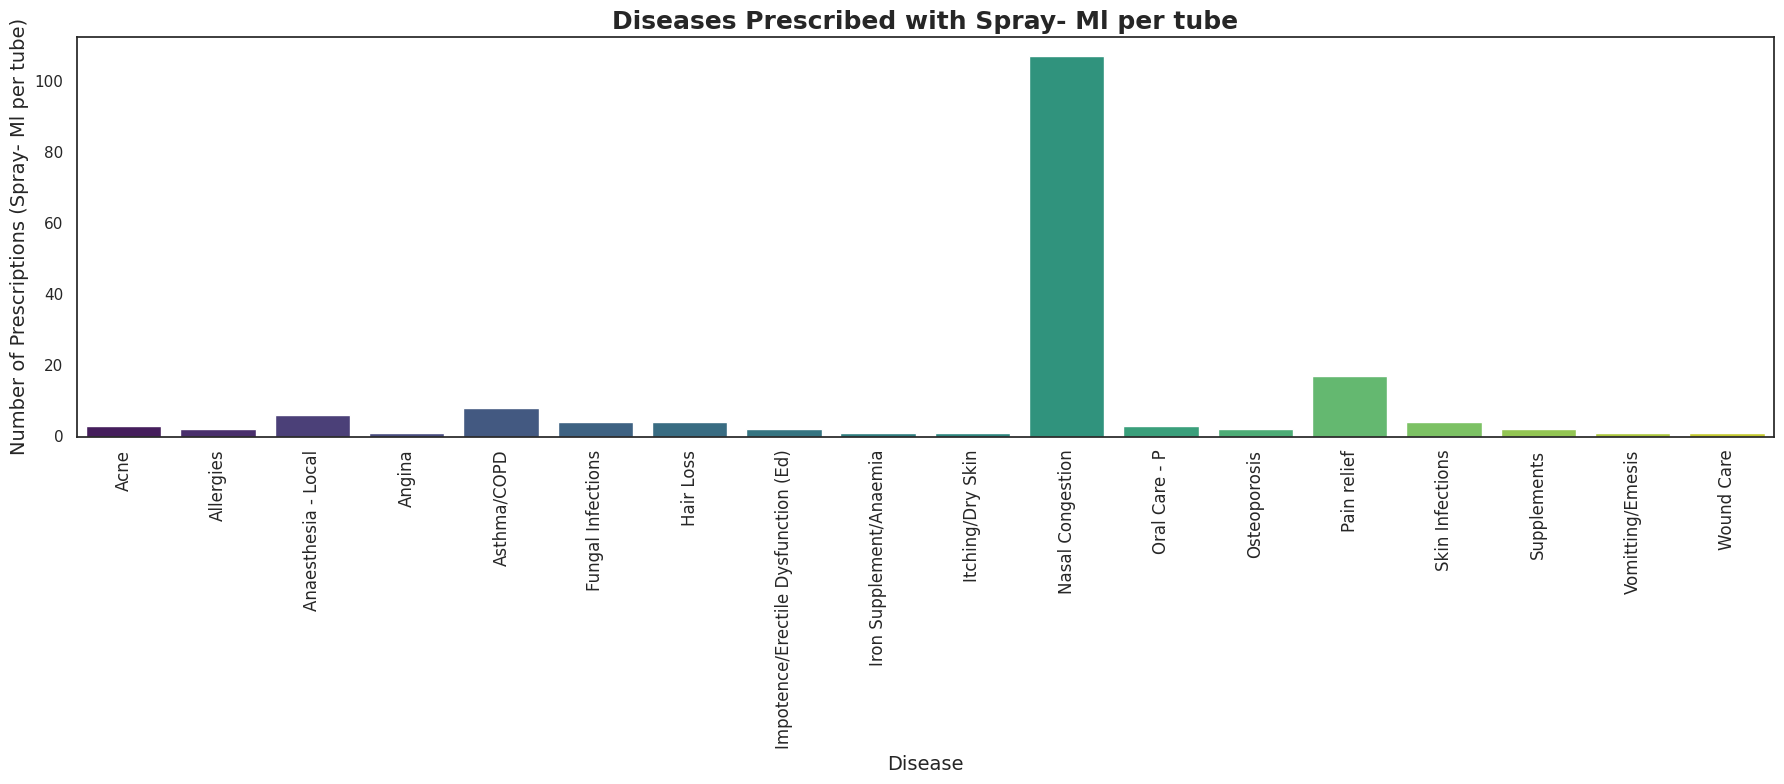

<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


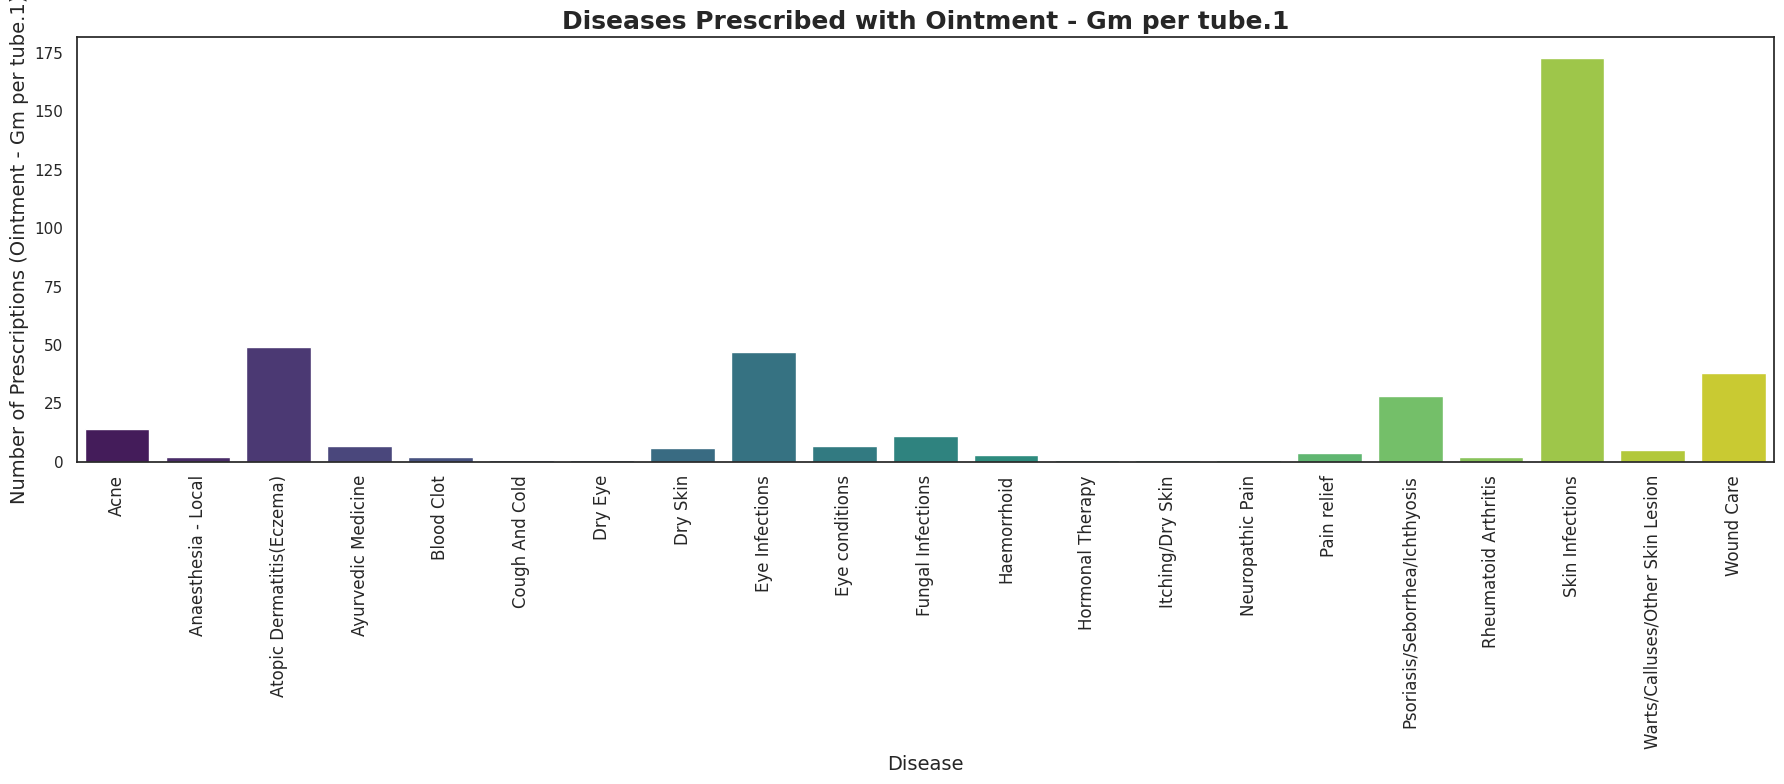

<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


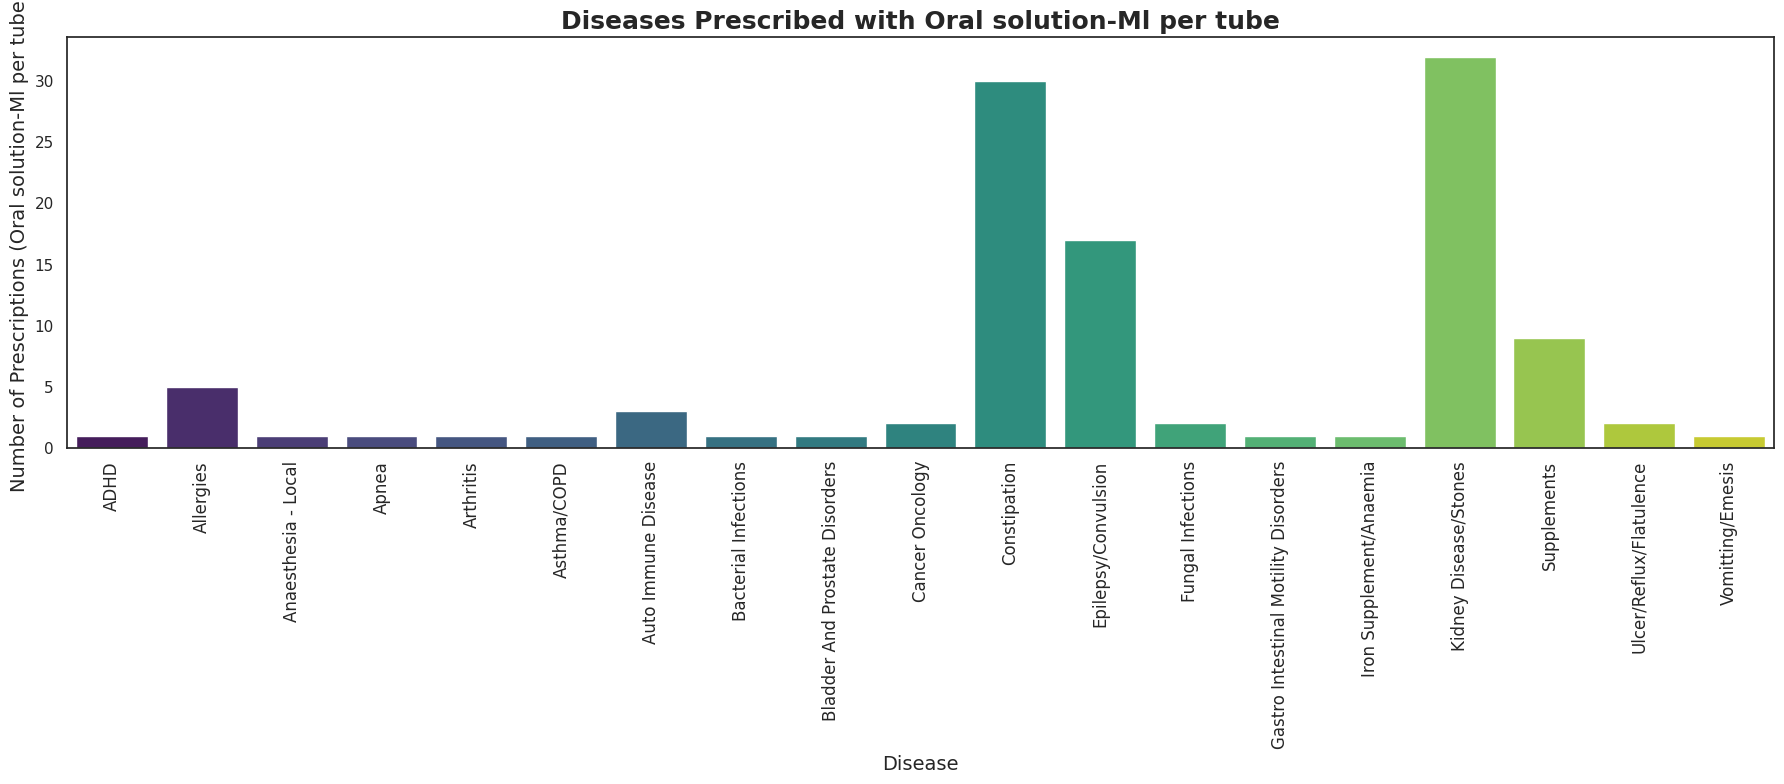

<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


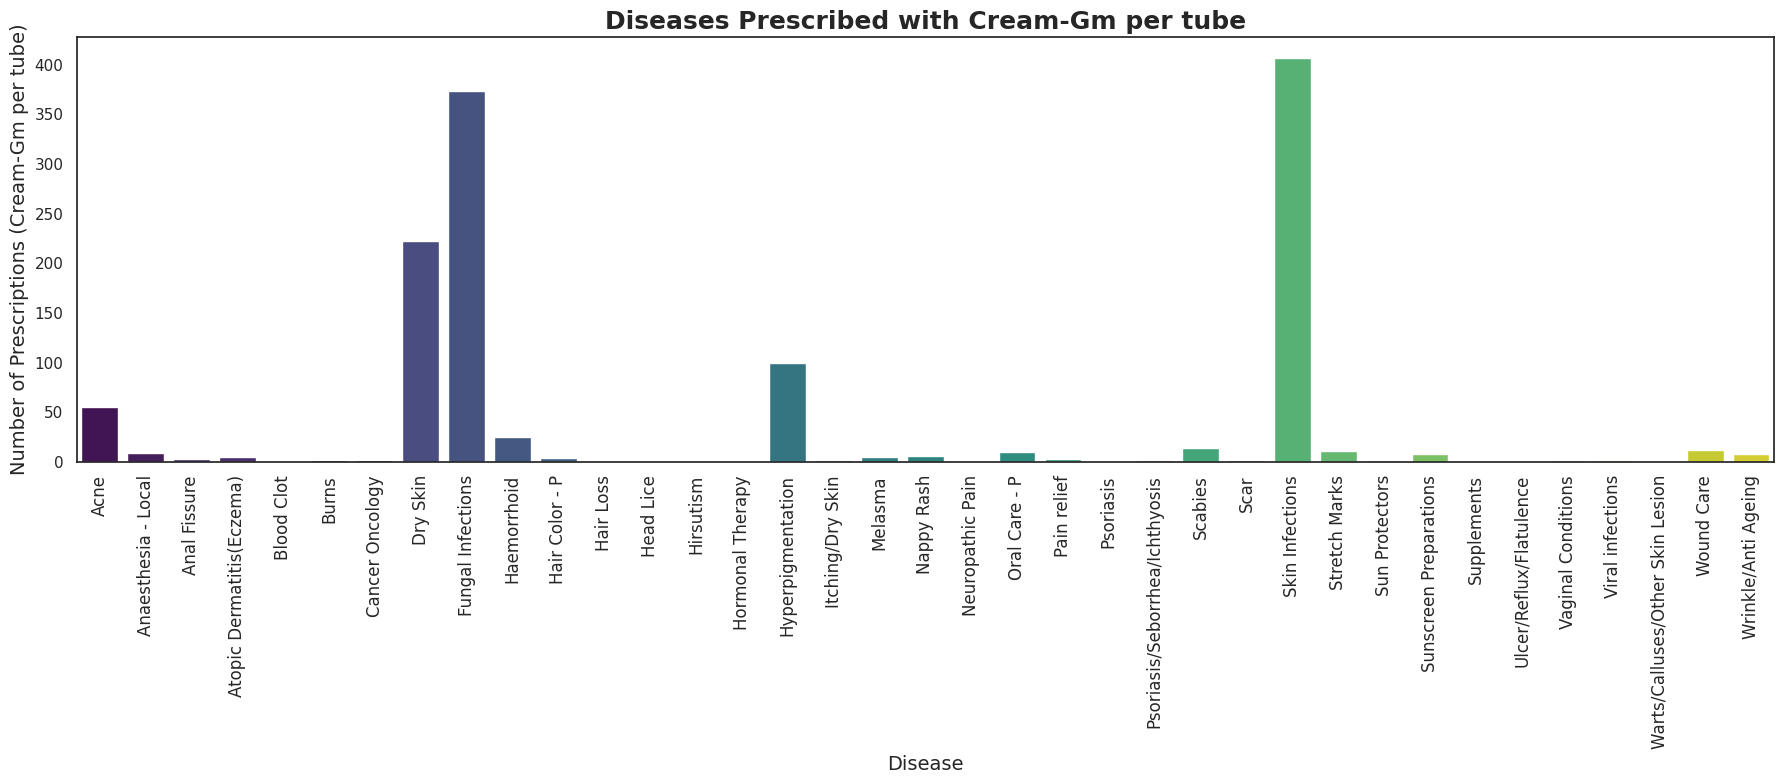

<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


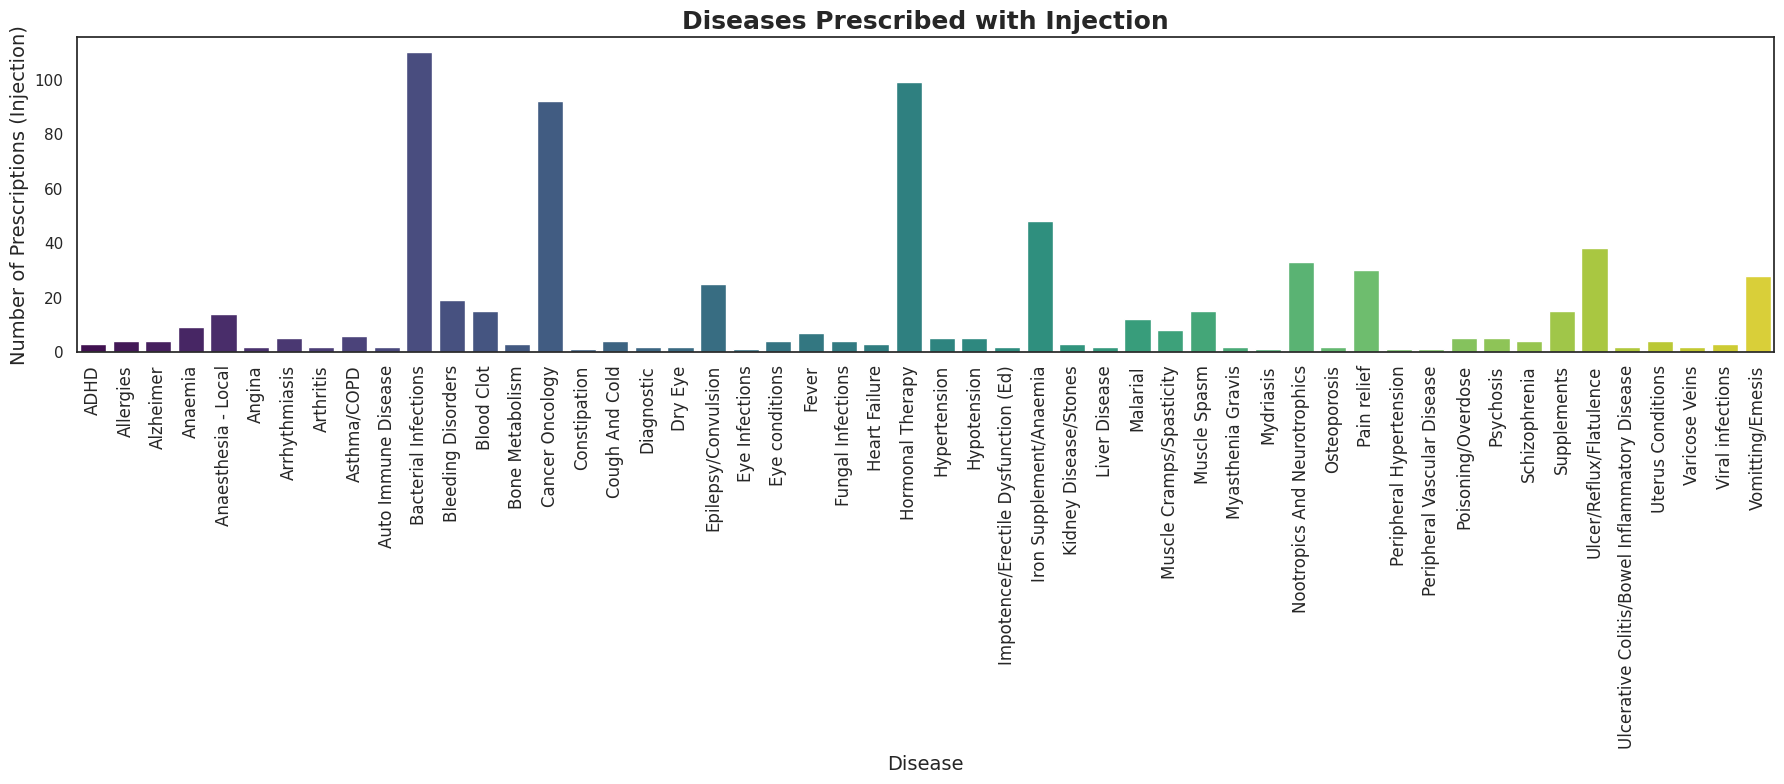

<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


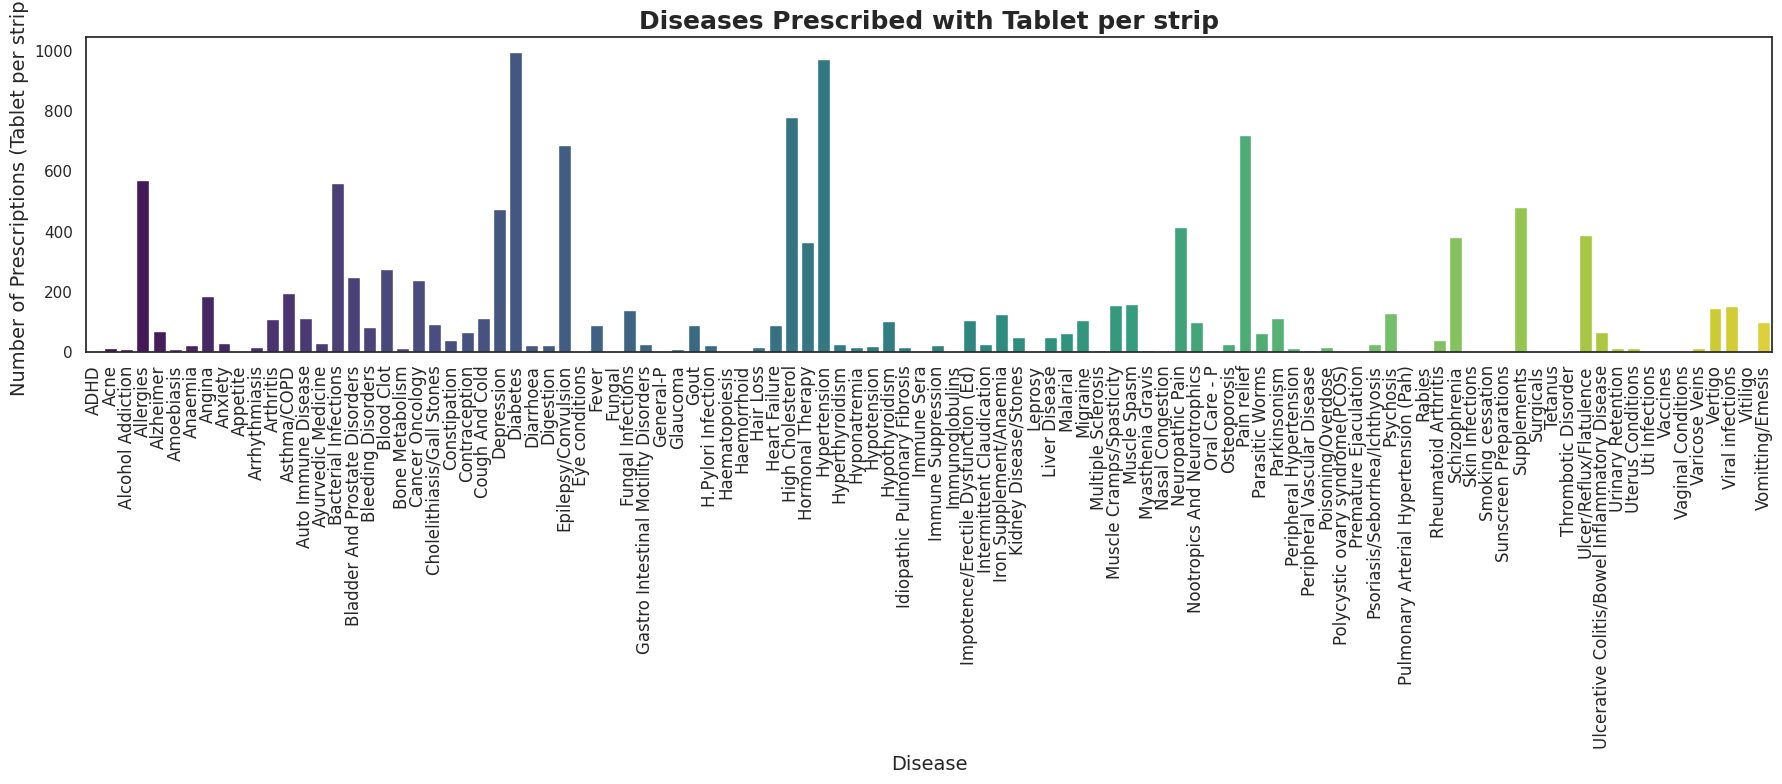

<ipython-input-28-f2a20e9f3d6a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')


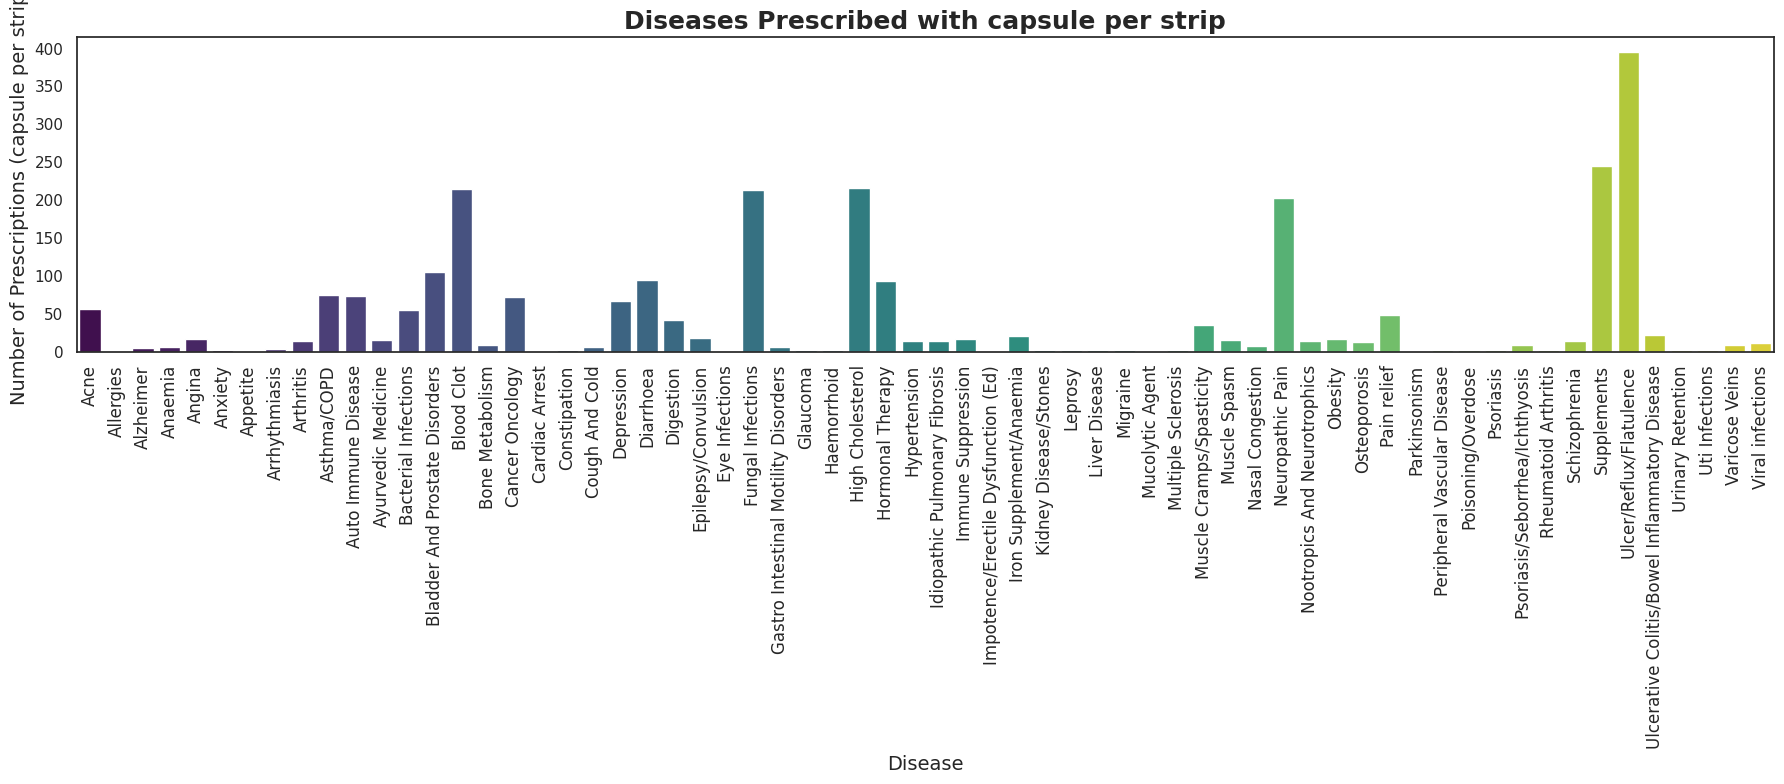

In [ ]:
columns_to_process = [
    'Gm per lotion',
       'Facewash - Gm per tube', 'Spray- Ml per tube',
       'Ointment - Gm per tube.1', 'Oral solution-Ml per tube',
       'Cream-Gm per tube', 'Injection', 'Tablet per strip',
       'capsule per strip'
]

for column in columns_to_process:
    # Marking all non-zero values as 1
    data[column] = data[column].apply(lambda x: 1 if x > 0 else 0)
    # Grouping by 'Disease' and sum the current column
    grouped_data = data.groupby('Disease')[column].sum().reset_index()
    # Filtering diseases where the column has been prescribed (sum > 0)
    grouped_data = grouped_data[grouped_data[column] > 0]
    plt.figure(figsize=(18, 8))
    sns.barplot(data=grouped_data, x='Disease', y=column, palette='viridis')
    plt.title(f'Diseases Prescribed with {column}', fontsize=18, fontweight='bold')
    plt.xlabel('Disease', fontsize=14)
    plt.ylabel(f'Number of Prescriptions ({column})', fontsize=14)
    plt.xticks(rotation=90, fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
file_path="/content/Final Cleaned data for model.xlsx"
data = pd.read_excel(file_path, sheet_name="Medicine")

data


Tablet name  Tablet per Strip                       Drug 1  \
0          Cogniza               10.0  Cerebroprotein Hydrolysate    
1           Atrest               10.0               Tetrabenazine    
2          SAFERET               10.0                Isotretinoin    
3          SAFERET               10.0                Isotretinoin    
4          Glotret               10.0                Isotretinoin    
...             ...               ...                          ...   
12432  Sysfol Plus               10.0                  Doxylamine    
12433  VOMIFORD MD               10.0                 Ondansetron    
12434     GRANITAG               10.0                 Granisetron    
12435      MELATAG               10.0                   Meclizine    
12436   VOMILAST G               30.0                  Doxylamine    

       Drug 1 quantity       Drug 2  Drug 2 Quantity       Drug 3  \
0                 90.0          NaN              NaN          NaN   
1                 25.0          NaN              NaN          NaN   
2                 20.0          NaN              NaN          NaN   
3                  5.0          NaN              NaN          NaN   
4                  5.0          NaN              NaN          NaN   
...                ...          ...              ...          ...   
12432             10.0  Folic Acid               2.0  Pyridoxine    
12433              4.0          NaN              NaN          NaN   
12434              1.0          NaN              NaN          NaN   
12435             25.0          NaN              NaN          NaN   
12436             10.0  Pyridoxine              10.0          NaN   

       Drug 3 info  Price Medicine Type  
0              NaN    239        Tablet  
1              NaN    336        Tablet  
2              NaN    150        Tablet  
3              NaN     80        Tablet  
4              NaN     92        Tablet  
...            ...    ...           ...  
12432         10.0     45        Tablet  
12433          NaN     50        Tablet  
12434          NaN     93        Tablet  
12435          NaN    145        Tablet  
12436          NaN    146        Tablet  

[12437 rows x 10 columns]

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
data['Drug_2_Deliberate_NaN'] = data['Drug 2'].isna().map({True: 'Yes', False: 'No'})
data['Drug_2_Quantity_Deliberate_NaN'] = data.apply(lambda row: 'Yes' if pd.isna(row['Drug 2 Quantity']) and pd.isna(row['Drug 2']) else 'No', axis=1)
data['Drug_3_Deliberate_NaN'] = data.apply(lambda row: 'Yes' if pd.isna(row['Drug 3']) and pd.isna(row['Drug 2']) else 'No', axis=1)
data['Drug_3_Info_Deliberate_NaN'] = data.apply(lambda row: 'Yes' if pd.isna(row['Drug 3 info']) and pd.isna(row['Drug 3']) else 'No', axis=1)

# Display updated DataFrame
print(data.head())


  Tablet name  Tablet per Strip                       Drug 1  Drug 1 quantity  \
0    Cogniza               10.0  Cerebroprotein Hydrolysate              90.0   
1     Atrest               10.0               Tetrabenazine              25.0   
2    SAFERET               10.0                Isotretinoin              20.0   
3    SAFERET               10.0                Isotretinoin               5.0   
4    Glotret               10.0                Isotretinoin               5.0   

  Drug 2  Drug 2 Quantity Drug 3  Drug 3 info  Price Medicine Type  \
0    NaN              NaN    NaN          NaN    239        Tablet   
1    NaN              NaN    NaN          NaN    336        Tablet   
2    NaN              NaN    NaN          NaN    150        Tablet   
3    NaN              NaN    NaN          NaN     80        Tablet   
4    NaN              NaN    NaN          NaN     92        Tablet   

  Drug_2_Deliberate_NaN Drug_2_Quantity_Deliberate_NaN Drug_3_Deliberate_NaN  \
0           

In [ ]:
data.fillna({
    'Drug 2': 'None',
    'Drug 2 Quantity': 0,
    'Drug 3': 'None',
    'Drug 3 info': 0
}, inplace=True)

data.rename(columns={'Drug 3 info': 'Drug 3 Quantity'}, inplace=True)
data

Tablet name  Tablet per Strip                       Drug 1  \
0          Cogniza               10.0  Cerebroprotein Hydrolysate    
1           Atrest               10.0               Tetrabenazine    
2          SAFERET               10.0                Isotretinoin    
3          SAFERET               10.0                Isotretinoin    
4          Glotret               10.0                Isotretinoin    
...             ...               ...                          ...   
12432  Sysfol Plus               10.0                  Doxylamine    
12433  VOMIFORD MD               10.0                 Ondansetron    
12434     GRANITAG               10.0                 Granisetron    
12435      MELATAG               10.0                   Meclizine    
12436   VOMILAST G               30.0                  Doxylamine    

       Drug 1 quantity       Drug 2  Drug 2 Quantity       Drug 3  \
0                 90.0         None              0.0         None   
1                 25.0         None              0.0         None   
2                 20.0         None              0.0         None   
3                  5.0         None              0.0         None   
4                  5.0         None              0.0         None   
...                ...          ...              ...          ...   
12432             10.0  Folic Acid               2.0  Pyridoxine    
12433              4.0         None              0.0         None   
12434              1.0         None              0.0         None   
12435             25.0         None              0.0         None   
12436             10.0  Pyridoxine              10.0         None   

       Drug 3 Quantity  Price Medicine Type Drug_2_Deliberate_NaN  \
0                  0.0    239        Tablet                   Yes   
1                  0.0    336        Tablet                   Yes   
2                  0.0    150        Tablet                   Yes   
3                  0.0     80        Tablet                   Yes   
4                  0.0     92        Tablet                   Yes   
...                ...    ...           ...                   ...   
12432             10.0     45        Tablet                    No   
12433              0.0     50        Tablet                   Yes   
12434              0.0     93        Tablet                   Yes   
12435              0.0    145        Tablet                   Yes   
12436              0.0    146        Tablet                    No   

      Drug_2_Quantity_Deliberate_NaN Drug_3_Deliberate_NaN  \
0                                Yes                   Yes   
1                                Yes                   Yes   
2                                Yes                   Yes   
3                                Yes                   Yes   
4                                Yes                   Yes   
...                              ...                   ...   
12432                             No                    No   
12433                            Yes                   Yes   
12434                            Yes                   Yes   
12435                            Yes                   Yes   
12436                             No                    No   

      Drug_3_Info_Deliberate_NaN  
0                            Yes  
1                            Yes  
2                            Yes  
3                            Yes  
4                            Yes  
...                          ...  
12432                         No  
12433                        Yes  
12434                        Yes  
12435                        Yes  
12436                        Yes  

[12437 rows x 14 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12437 entries, 0 to 12436
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tablet name                     12435 non-null  object 
 1   Tablet per Strip                12411 non-null  float64
 2   Drug 1                          12437 non-null  object 
 3   Drug 1 quantity                 12270 non-null  float64
 4   Drug 2                          12437 non-null  object 
 5   Drug 2 Quantity                 12437 non-null  float64
 6   Drug 3                          12437 non-null  object 
 7   Drug 3 Quantity                 12437 non-null  float64
 8   Price                           12437 non-null  int64  
 9   Medicine Type                   12437 non-null  object 
 10  Drug_2_Deliberate_NaN           12437 non-null  object 
 11  Drug_2_Quantity_Deliberate_NaN  12437 non-null  object 
 12  Drug_3_Deliberate_NaN           

In [ ]:
data.describe()

Tablet per Strip  Drug 1 quantity  Drug 2 Quantity  Drug 3 Quantity  \
count      12411.000000     12270.000000     12437.000000     12437.000000   
mean          12.892273       256.226976       100.189917        94.818767   
std           18.375923      3739.644579       959.026142      2813.499822   
min            1.000000         0.000000         0.000000         0.000000   
25%           10.000000        10.000000         0.000000         0.000000   
50%           10.000000        40.000000         0.000000         0.000000   
75%           10.000000       150.000000        12.000000         0.000000   
max         1000.000000    200000.000000     50000.000000    150000.000000   

               Price  
count   12437.000000  
mean      350.342848  
std      2457.189044  
min         1.000000  
25%        79.000000  
50%       144.000000  
75%       241.000000  
max    136503.000000

In [ ]:
data.isnull().sum()

Tablet name                         2
Tablet per Strip                   26
Drug 1                              0
Drug 1 quantity                   167
Drug 2                              0
Drug 2 Quantity                     0
Drug 3                              0
Drug 3 Quantity                     0
Price                               0
Medicine Type                       0
Drug_2_Deliberate_NaN               0
Drug_2_Quantity_Deliberate_NaN      0
Drug_3_Deliberate_NaN               0
Drug_3_Info_Deliberate_NaN          0
dtype: int64

In [ ]:
data.dropna(inplace=True)


In [ ]:
data.isnull().sum()

Tablet name                       0
Tablet per Strip                  0
Drug 1                            0
Drug 1 quantity                   0
Drug 2                            0
Drug 2 Quantity                   0
Drug 3                            0
Drug 3 Quantity                   0
Price                             0
Medicine Type                     0
Drug_2_Deliberate_NaN             0
Drug_2_Quantity_Deliberate_NaN    0
Drug_3_Deliberate_NaN             0
Drug_3_Info_Deliberate_NaN        0
dtype: int64

In [ ]:
df=data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12250 entries, 0 to 12436
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tablet name                     12250 non-null  object 
 1   Tablet per Strip                12250 non-null  float64
 2   Drug 1                          12250 non-null  object 
 3   Drug 1 quantity                 12250 non-null  float64
 4   Drug 2                          12250 non-null  object 
 5   Drug 2 Quantity                 12250 non-null  float64
 6   Drug 3                          12250 non-null  object 
 7   Drug 3 Quantity                 12250 non-null  float64
 8   Price                           12250 non-null  int64  
 9   Medicine Type                   12250 non-null  object 
 10  Drug_2_Deliberate_NaN           12250 non-null  object 
 11  Drug_2_Quantity_Deliberate_NaN  12250 non-null  object 
 12  Drug_3_Deliberate_NaN           12250

In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [ ]:

# Drop some less important columns
df.drop(columns=["Medicine Type",'Drug_2_Deliberate_NaN', 'Drug_2_Quantity_Deliberate_NaN',
       'Drug_3_Deliberate_NaN', 'Drug_3_Info_Deliberate_NaN'], inplace=True, errors='ignore')

# Encoding categorical variables
label_encoders = {}
categorical_columns = ["Tablet name", "Drug 1", "Drug 2", "Drug 3"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Saving the encoders for later use

X = df.drop(columns=["Price"])
y = df["Price"]

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.replace({'Yes': 1, 'No': 0})
X_test = X_test.replace({'Yes': 1, 'No': 0})
X_train = X_train.astype(int)
X_test = X_test.astype(int)

X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

y_train = np.log1p(y_train)#applying transformation
y_test = np.log1p(y_test)


# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Training & Evaluate All Models
results = {}

for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}


results_df = pd.DataFrame(results).T
results_df.sort_values(by="MAE", ascending=True, inplace=True)

print(results_df)
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error', n_iter=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))


#this code was for comparing models ad to evalute the performance

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 9800, number of used features: 8
[LightGBM] [Info] Start training from score 4.964672
                        MAE       MSE  R² Score
Random Forest      0.347893  0.290365  0.719464
XGBoost            0.377536  0.326625  0.684432
Decision Tree      0.413883  0.456491  0.558961
CatBoost           0.432257  0.385902  0.627160
LightGBM           0.436314  0.398129  0.615348
Linear Regression  0.748605  1.035163 -0.000123
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Random Forest MAE: 0.34645868353370485
Random Forest MSE: 0.2871478735819231
Random Forest R² Score: 0.7225721456414795


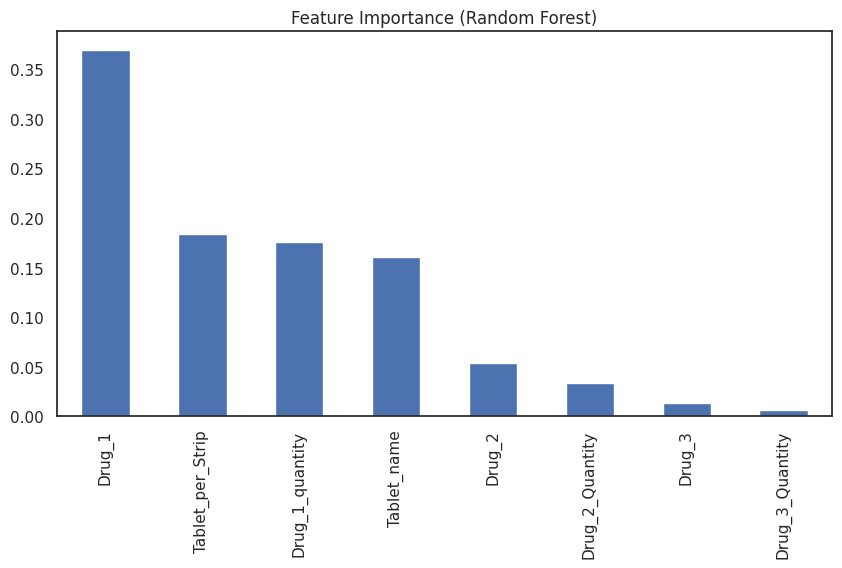

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importance (Random Forest)")
plt.show()



In [ ]:
df.drop(columns=["Medicine Type", 'Drug_2_Deliberate_NaN', 'Drug_2_Quantity_Deliberate_NaN',
                 'Drug_3_Deliberate_NaN', 'Drug_3_Info_Deliberate_NaN'], inplace=True, errors='ignore')

# 🔹 Encoding categorical variables
label_encoders = {}
categorical_columns = ["Tablet name", "Drug 1", "Drug 2", "Drug 3"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["Price"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, np.log1p(y), test_size=0.2, random_state=42)  # Log transformation
#using just 4 model
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=200, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=200, random_state=42),
    "CatBoost": cb.CatBoostRegressor(verbose=0, random_state=42)
}

# 🔹 Training & Evaluating Models
best_model = None
best_mae = float("inf")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    if mae < best_mae:
        best_mae = mae
        best_model = model

# 🔹 Saving Best Model & Encoders
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# 🔹 Function to Predict Price of a Tablet
def predict_price(tablet_name, tablet_per_strip, drug1, drug1_qty, drug2=None, drug2_qty=None, drug3=None, drug3_qty=None):
    """Predicts the price of a single tablet based on input details."""

    # Loading trained model & encoders
    with open("best_model.pkl", "rb") as f:
        model = pickle.load(f)
    with open("label_encoders.pkl", "rb") as f:
        label_encoders = pickle.load(f)

    # preprocessing input data
    input_data = {
        "Tablet name": tablet_name,
        "Tablet per Strip": tablet_per_strip,
        "Drug 1": drug1,
        "Drug 1 quantity": drug1_qty,
        "Drug 2": drug2 if drug2 else "Unknown",
        "Drug 2 Quantity": drug2_qty if drug2_qty else 0,
        "Drug 3": drug3 if drug3 else "Unknown",
        "Drug 3 Quantity": drug3_qty if drug3_qty else 0
    }

    # Encoding categorical values
    for col in categorical_columns:
        if input_data[col] in label_encoders[col].classes_:
            input_data[col] = label_encoders[col].transform([input_data[col]])[0]
        else:
            input_data[col] = -1  # Unseen data handling

    # Convertingg to DataFrame
    input_df = pd.DataFrame([input_data])

    # Predict log price and reverse transformation
    log_pred_price = model.predict(input_df)[0]
    predicted_price = np.expm1(log_pred_price)  # Reversing log transformation

    return round(predicted_price, 2)




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 9800, number of used features: 8
[LightGBM] [Info] Start training from score 4.964672


In [ ]:
tablet_name = "Saferet"
tablet_per_strip =10
drug1 = "Isotretinoin "
drug2 = "collagen"


predicted_price = predict_price(tablet_name, tablet_per_strip, drug1, drug1_qty, drug2, drug2_qty)
print(f"Predicted Price for  {tablet_name} tablet: ₹{predicted_price}")

Predicted Price for  Saferet tablet: ₹92.76
